## Introduction
The banking and finance industries are facing new and unique business challenges brought on by low cash rate, COVID-19 economic impacts, expanded regulatory oversight, and higher consumer expectations. Hence, large organizations need to optimize their business processes, control expenses, and increase revenue to successfully competes in the marketplace. One of the most common practices in the finance industry is to run a marketing campaign for cross-selling (marketing additional products to existing customers) or to attract new clients. There are different type of marketing campaigns for example some marketing campaigns are based on phone calls. The main question is how to identify and contact right customers for cross-selling? Sometimes clients are not financially able to obtain the new products or there is no need for a such a product. Therefore, to optimise the efforts, right clients must be identified and be contacted. This question can be answered by using Machine Learning. Our focus in this research is on phone-based marketing campaigns for cross-selling products.

By developing a predictive model, we can identify the right customers to be contacted and help the banks to optimise their marketing efforts and increase their profit.

The majority of my employment background is in banking industry and I have a firsthand experience in this type of marketing campaigns. This predictive model with a high accuracy can help a bank to optimise their efforts and channel their marketing campaign in a right direction.


Machine Learning is significantly improving the way an organization conducts business and makes decisions. To build a predictive model, various supervised machine learning algorithms such as Logistic Regression, Decision Trees (DTs) and Random Forest will be utilized. In addition, Artificial Neural Networks (ANNs) are one of the famous and modern computational models used in machine learning. ANNs could discover non-linear relationships from complex data, and extract the useful features automatically. ANN can be trained from examples and generalize the model to predict the relationships of new dataset. Multilayer Perceptron (MLP) is a class of feedforward ANN. In this project, MLP with different number of hidden layers will be developed to predict the client’s action based on the given data


## Literature Review
Supervised machine learning techniques have been used in variety of research works. In this project, the real-world data from a banking institution in Portugal (Banco de Portugal) is used. Moro et al. (2011) used the same dataset to classify the clients, increase the campaign efficiency and the success rate of telemarketing for the bank. The researchers evaluated the Support Vector Machine (SVM), Decision Tree (DT) and Naive Bayes classification accuracies. The performance of the classifiers was measured by the Receiver Operator Characteristics (ROC) curve. The results showed that the SVM produces the most accurate model. The rattle tool in R software was used for the feature selection in this research. The results showed that Call duration was the most relevant feature which indicates that longer calls could increase the success rate. The second most important feature was the month of contact and it was showed that the probability of success will be higher if a campaign occurs in the last month of each trimester (March, June, September and December). The other most important independent variables are number of contacts, days since last contact, last contact result and first contact duration attributes respectively. In another study, Moro et al. (2014), a data set with 150 attributes was used and the success of bank telemarketing was modelled by Logistic Regression (LR), Decision Tree, Support Vector Machine and Neural Network (NN). The result showed that neural network yielded to the most accurate prediction.


Grzonka et al. (2016) used the same dataset and applied decision trees, bagging, boosting, and random forests classifiers. Considering the full set of data, the Gini index was utilized to determine the most significant attributes. They showed that the most significant attribute was the duration of a call but in reality, this independent variable is known only after performing a direct marketing operation. Hence the parameter was omitted in this research. The researchers used pOutcome (outcome of the previous marketing campaign) Month, Job, Age, Balance Education, Campaign, Marital attributes as their predictors. Compared Moro et al. (2011) this approach had a negative impact on the performance of Classifiers. In the reduced attributes scenario, the analyses indicated that the most significant parameter is the effectiveness of previous campaigns. The confusion matrices and misclassification errors were used to evaluate the accuracy of the classifiers. The best performance was obtained for random forests and the highest percentage of true positive classifications was obtained for a single decision tree.

Selma (2020) applied an Artificial Neural Network (ANN) method on the same dataset. The study showed that the ANN outperformed other statistical and numerical techniques. In addition, the results showed the effectiveness of the ANN approach and its capability to predict the class. The main advantage of ANN over other statistical methods lies on its ability to capture nonlinear relationship between variables and optimization can be performed quickly, without considering the mathematical form of the relation between input and the output data.

Kim et al. (2015) used Deep Convolutional Neural Network architecture (DCNN) to predict the customer’s classification. CNN performs feature extractions by utilizing the local relationship between nodes for hierarchical. Hence, CNN is an appropriate model where dataset contains continual characteristics, such as image or human activity recognition. The study examined the correlation between the attributes and showed that there is not enough relationship between the attributes. So, the study suggested that CNN is not an appropriate model for exploiting the financial dataset. On the other hand, DCNN is a CNN with several pairs of convolutional and pooling layers, which utilizes convolution to extract the features from near nodes, hence the study proposed that the DCNN could be a proper model for recommending the financial instrument.


## Problem statement
Banco de Portugal, a banking institution in Portugal, offered their clients a term deposit through a phone-based marketing campaign. Data was collected about client details, phone call details, and the results. The main question is if we can improve future marketing campaigns by analysing past marketing campaign data and recommending which customer to target. The purpose of this project is to predict if the client on call would accept to make a term deposit or not based on the information of the clients. The input variables will be out client personal details (such as age,education,job), client financial details (such as account balance, loans) and the details of the last contact of the current campaign (such as day,month,duration,outcome. The outcome is binary, whether the client has subscribed a term deposit or not.

## Dataset
The data is related with direct marketing campaigns of a Portuguese banking institution. This dataset is publicly available for research. The full dataset was described and analysed in:
[Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. 

In [ ]:
!pip install torch torchvision
import tensorflow as tf
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVC 
from sklearn.pipeline import make_pipeline
from keras import models
from keras import layers
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# machine learning
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

random.seed(10)


In [ ]:
from google.colab import drive
drive.mount('googledrive')

Drive already mounted at googledrive; to attempt to forcibly remount, call drive.mount("googledrive", force_remount=True).


In [ ]:
data_path = "/content/googledrive/MyDrive/bank.csv"

In [ ]:
df = pd.read_csv(data_path,  sep=";")

In [ ]:
df.head(20)

age           job   marital  education  ... pdays  previous poutcome   y
0    58    management   married   tertiary  ...    -1         0  unknown  no
1    44    technician    single  secondary  ...    -1         0  unknown  no
2    33  entrepreneur   married  secondary  ...    -1         0  unknown  no
3    47   blue-collar   married    unknown  ...    -1         0  unknown  no
4    33       unknown    single    unknown  ...    -1         0  unknown  no
5    35    management   married   tertiary  ...    -1         0  unknown  no
6    28    management    single   tertiary  ...    -1         0  unknown  no
7    42  entrepreneur  divorced   tertiary  ...    -1         0  unknown  no
8    58       retired   married    primary  ...    -1         0  unknown  no
9    43    technician    single  secondary  ...    -1         0  unknown  no
10   41        admin.  divorced  secondary  ...    -1         0  unknown  no
11   29        admin.    single  secondary  ...    -1         0  unknown  no
12   53    technician   married  secondary  ...    -1         0  unknown  no
13   58    technician   married    unknown  ...    -1         0  unknown  no
14   57      services   married  secondary  ...    -1         0  unknown  no
15   51       retired   married    primary  ...    -1         0  unknown  no
16   45        admin.    single    unknown  ...    -1         0  unknown  no
17   57   blue-collar   married    primary  ...    -1         0  unknown  no
18   60       retired   married    primary  ...    -1         0  unknown  no
19   33      services   married  secondary  ...    -1         0  unknown  no

[20 rows x 17 columns]

In [ ]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


10 columns are object and 7 are int64. The Int64 columns are: age, balance, day. duration, campaign, pdays, previous, and previous. The object columns are job, martial, education, default, housing, loan, contact, month, poutcome, and y .

In [ ]:
df.describe(include="all")

age          job  marital  ...      previous poutcome      y
count   45211.000000        45211    45211  ...  45211.000000    45211  45211
unique           NaN           12        3  ...           NaN        4      2
top              NaN  blue-collar  married  ...           NaN  unknown     no
freq             NaN         9732    27214  ...           NaN    36959  39922
mean       40.936210          NaN      NaN  ...      0.580323      NaN    NaN
std        10.618762          NaN      NaN  ...      2.303441      NaN    NaN
min        18.000000          NaN      NaN  ...      0.000000      NaN    NaN
25%        33.000000          NaN      NaN  ...      0.000000      NaN    NaN
50%        39.000000          NaN      NaN  ...      0.000000      NaN    NaN
75%        48.000000          NaN      NaN  ...      0.000000      NaN    NaN
max        95.000000          NaN      NaN  ...    275.000000      NaN    NaN

[11 rows x 17 columns]

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df_dup = df[df.duplicated(keep="last")]
df_dup

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []

## Checking class distribution of the dataset

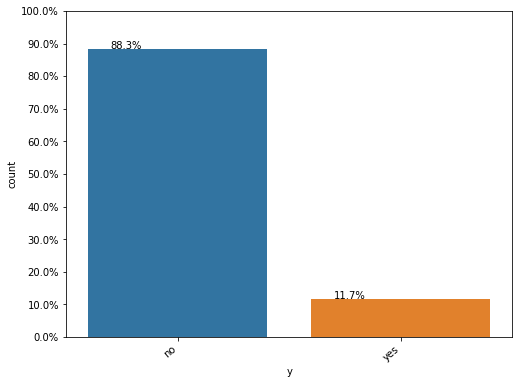

In [ ]:
# Check imbalance plot percentage
plt.figure(figsize=(8,6))
Y = df["y"]
total = len(Y)*1.
ax=sns.countplot(x="y", data=df)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
    
#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
#adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# ax.legend(labels=["no","yes"])
plt.show()

In [ ]:
# Check imbalance counts
print(df["y"].value_counts())

no     39922
yes     5289
Name: y, dtype: int64


There are 39,922 “no” which is about 88.3% of the data and only 5,289 “yes” which is 11.7% “of the data so the dataset is imbalanced.

###  Univariate Analysis of Categorical variables:

In [ ]:
# Create Count Plots of each feature to find out the class distribution for each feature. 
#define a function to plot the count plots
def countplot(label, dataset):
  plt.figure(figsize=(15,10))
  Y = df[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=df)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

In [ ]:
%matplotlib inline

def countplot_withY(label, dataset):
  plt.figure(figsize=(20,10))
  Y = df[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=df, hue="y")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

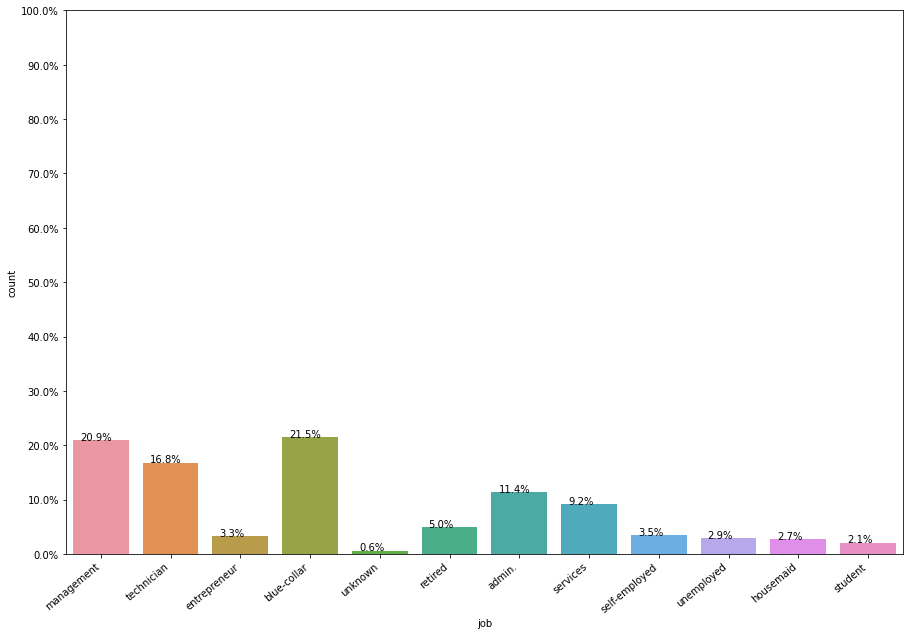

In [ ]:
countplot("job", df)

Based on the above distribution, 21.5% of our customers are "blue-collar" and 20.9% have a management job.How many people who work as an admin have subscribed a term deposit?

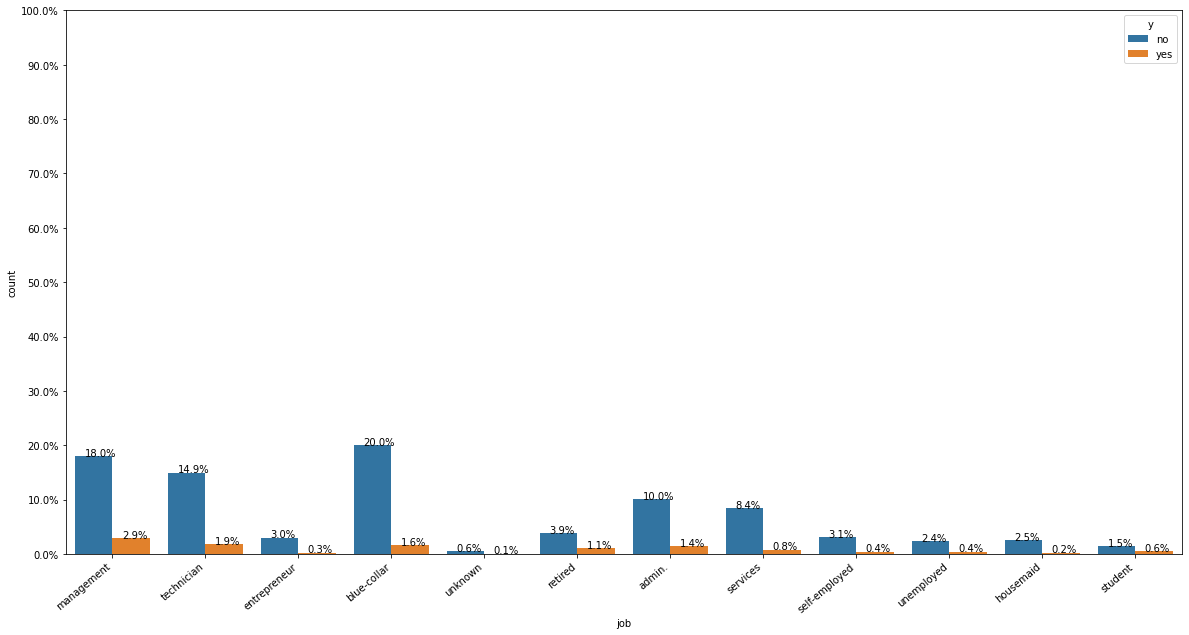

In [ ]:
countplot_withY("job", df)

The highest success rate belongs to customers who has a management job , which make sense as they are busy professional and the tendency to accept a deal over the phone could be higher between them. The second highest success rate belongs to technician , again they are busy people. the lowest success rate belongs to housemaid , unemployed and self-employed people. 

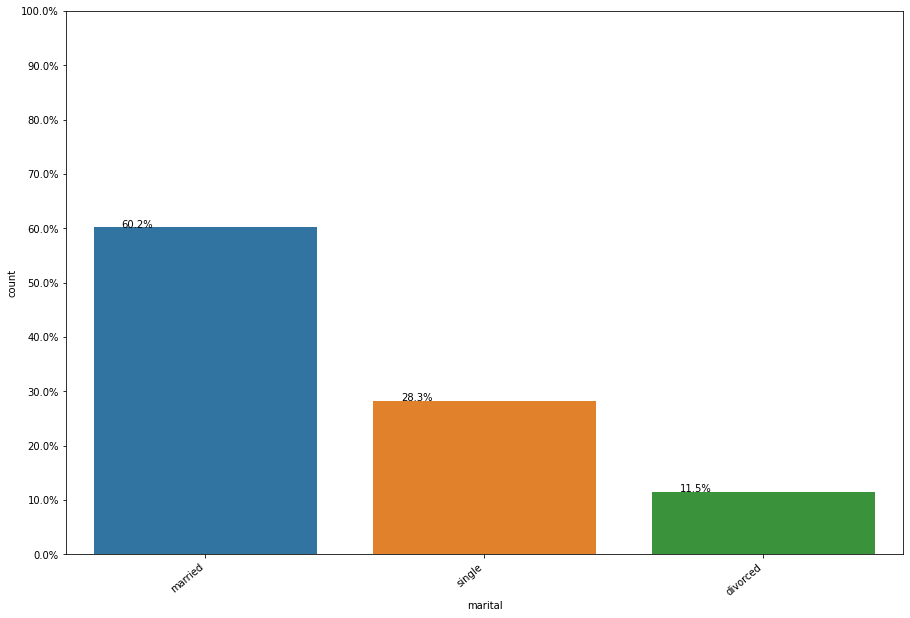

In [ ]:
countplot("marital", df)

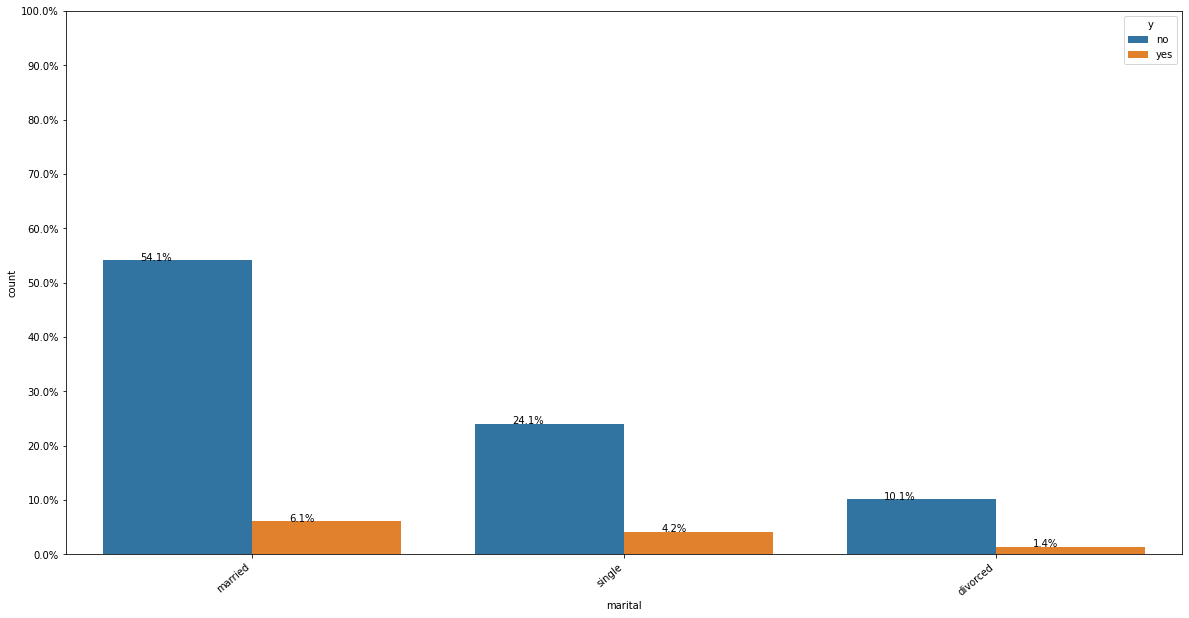

In [ ]:
countplot_withY("marital", df)

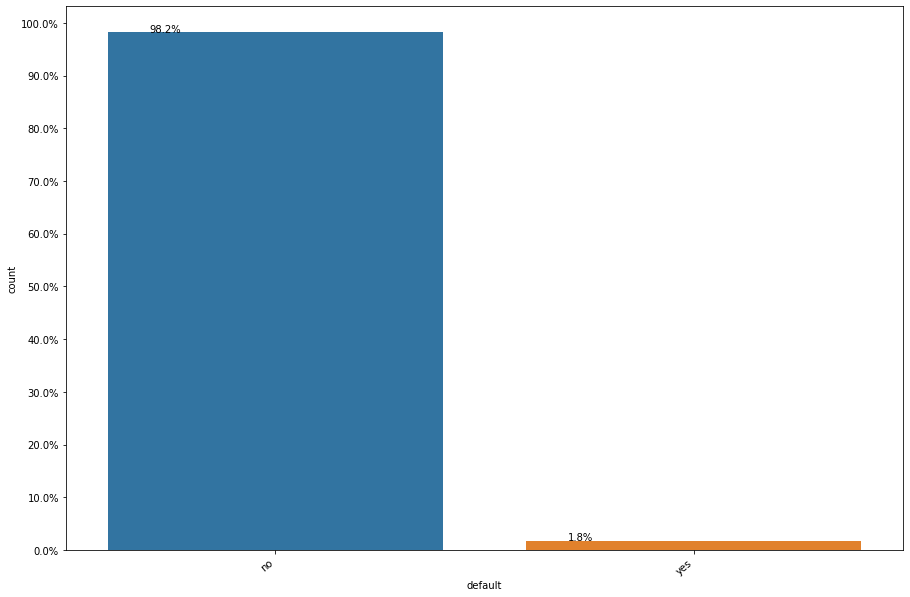

In [ ]:
countplot("default", df)

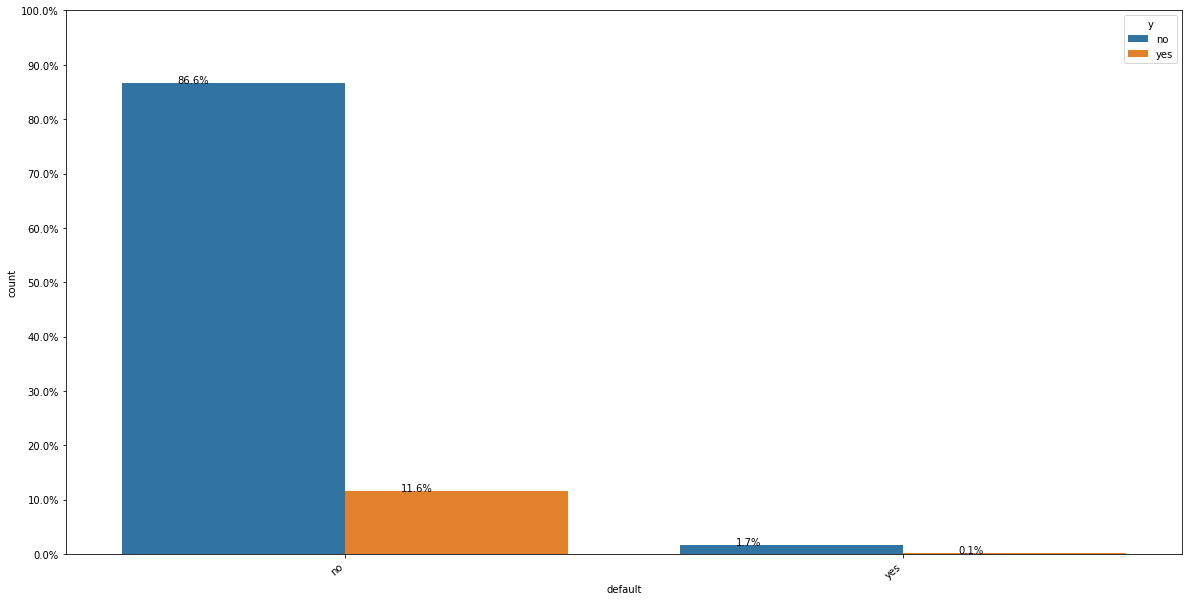

In [ ]:
countplot_withY("default", df)

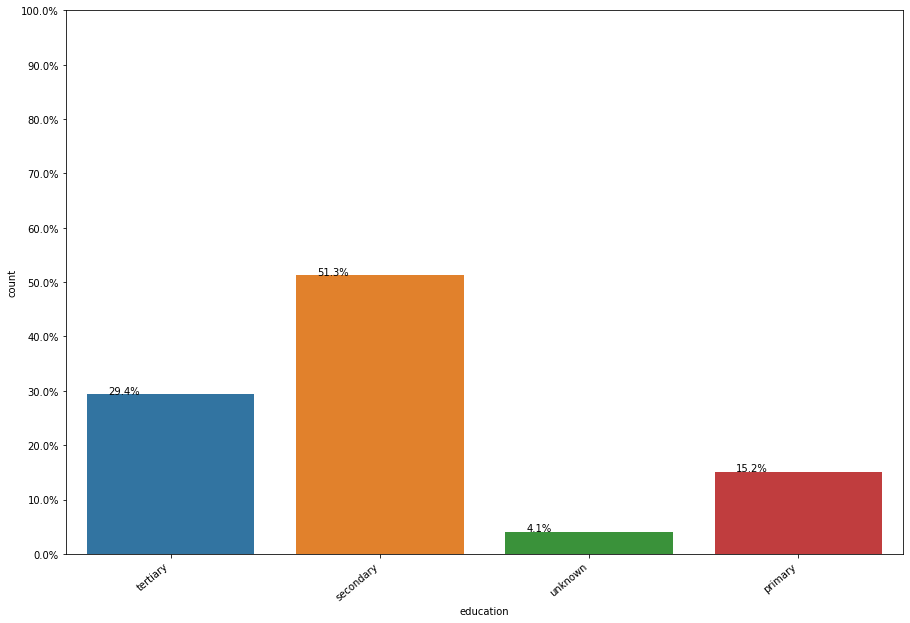

In [ ]:
countplot("education",df)

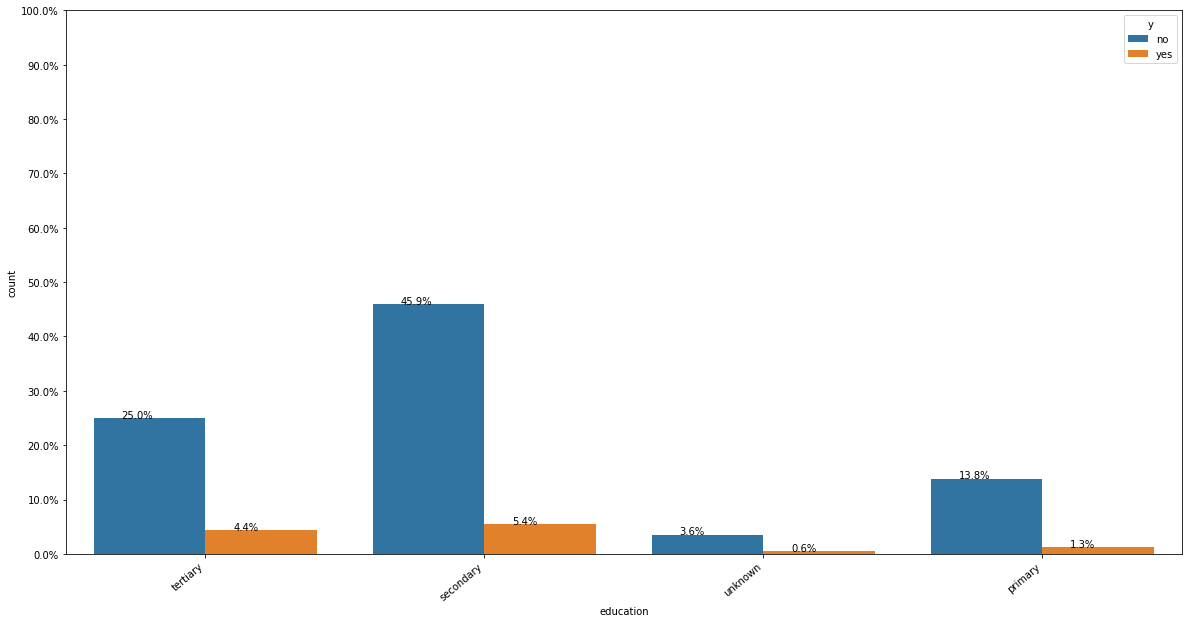

In [ ]:
countplot_withY("education", df)

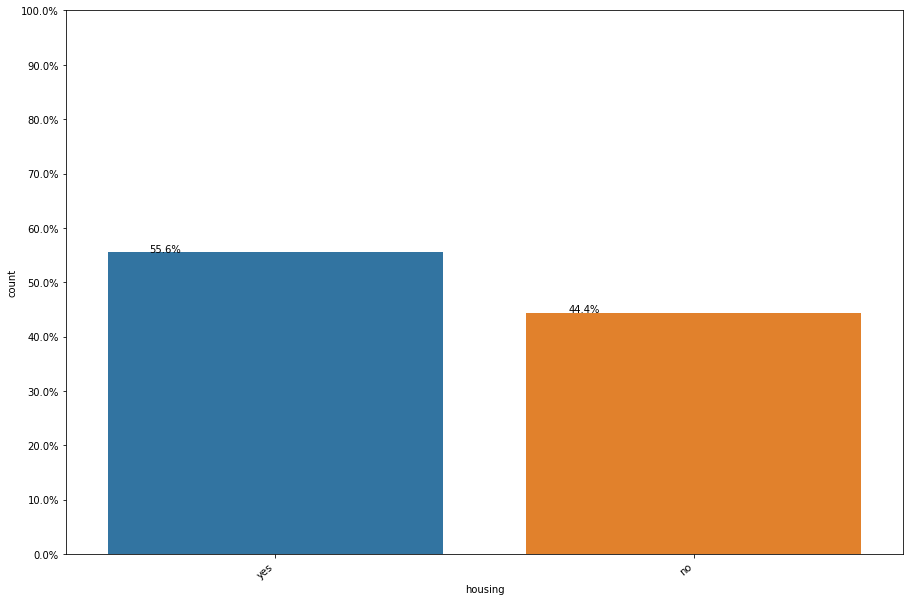

In [ ]:
countplot("housing", df)

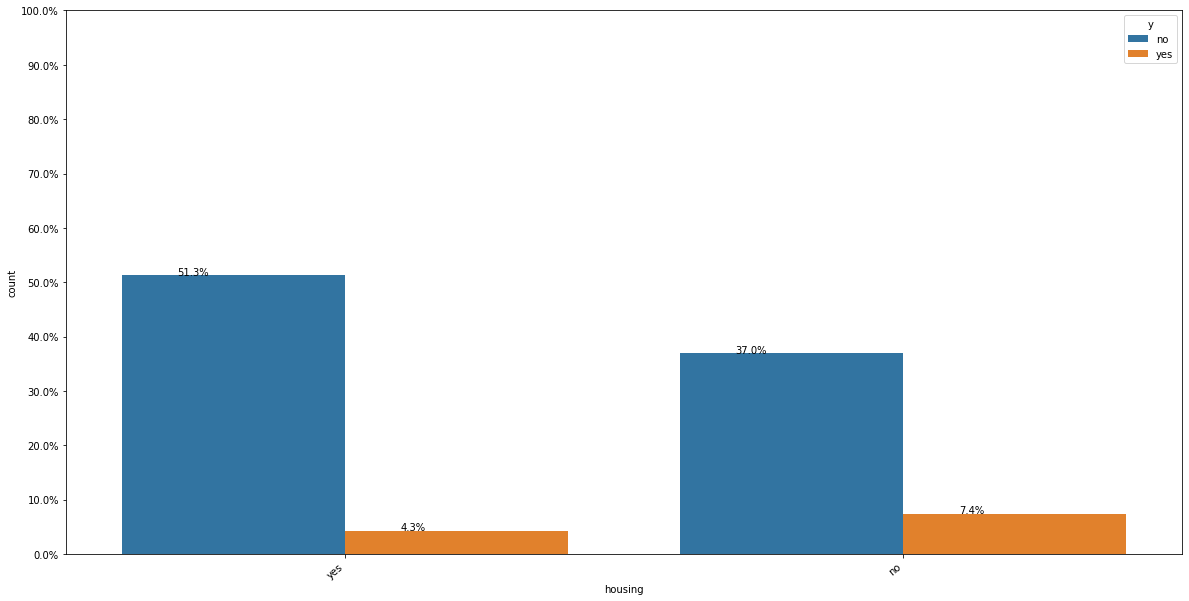

In [ ]:
countplot_withY("housing", df)

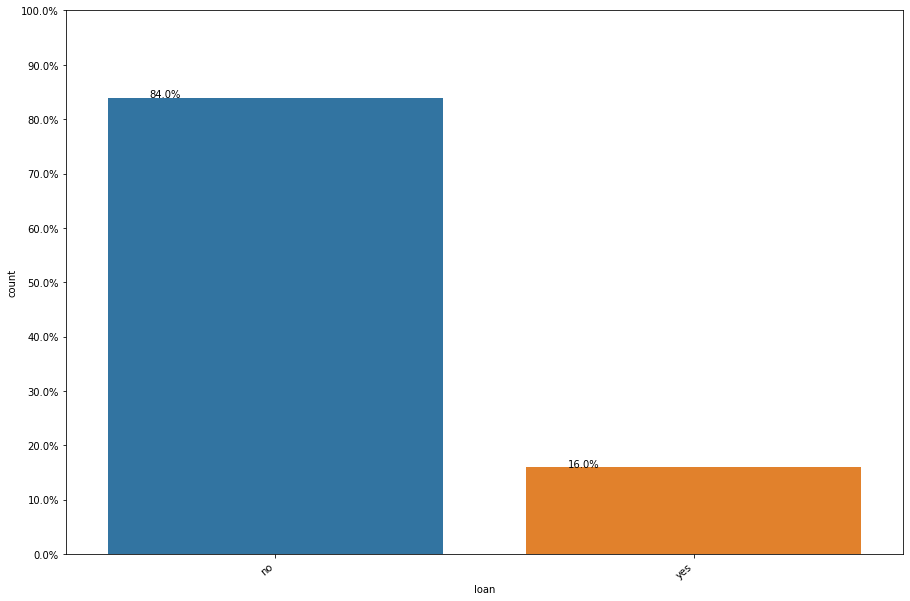

In [ ]:
countplot("loan", df)

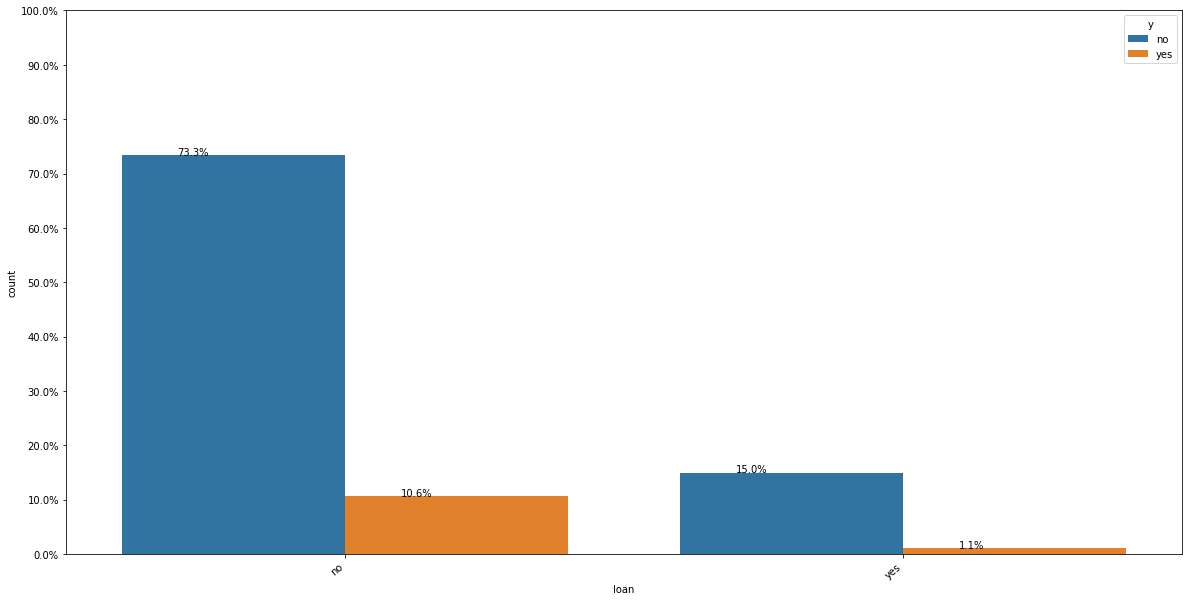

In [ ]:
countplot_withY("loan", df)

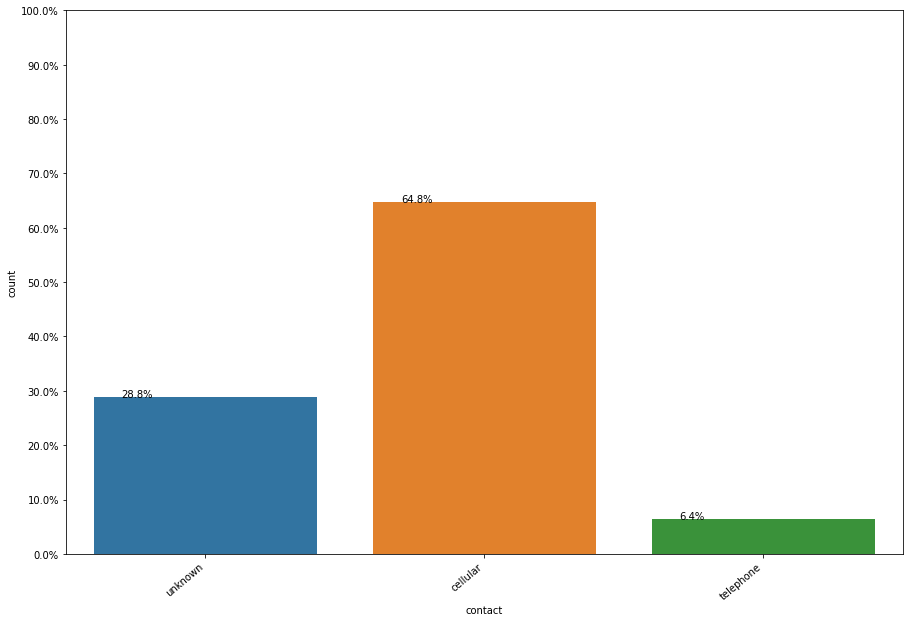

In [ ]:
countplot("contact", df)

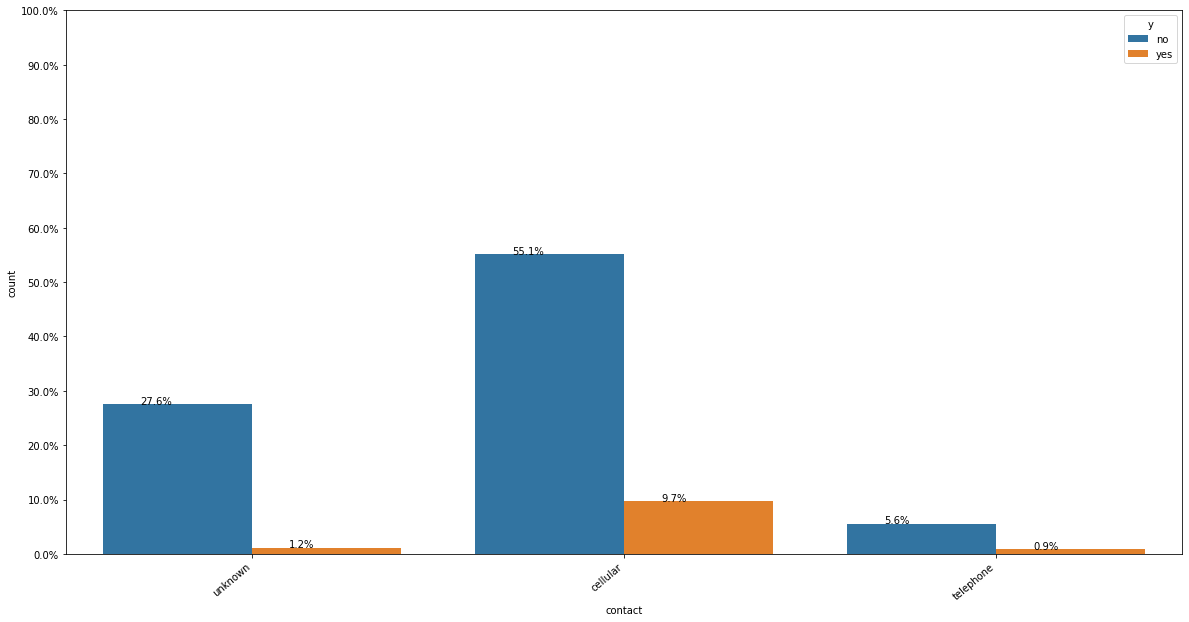

In [ ]:
countplot_withY("contact", df)

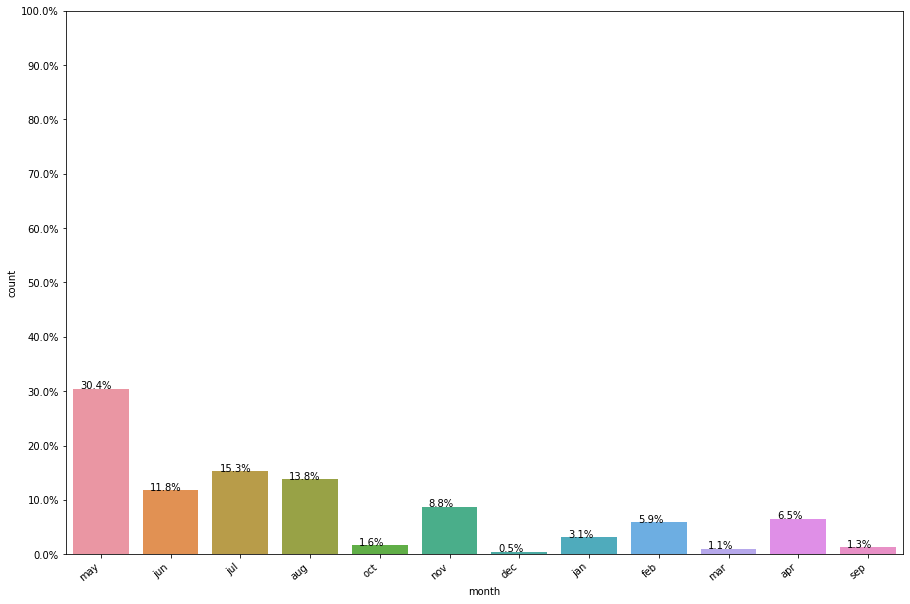

In [ ]:
countplot("month", df)

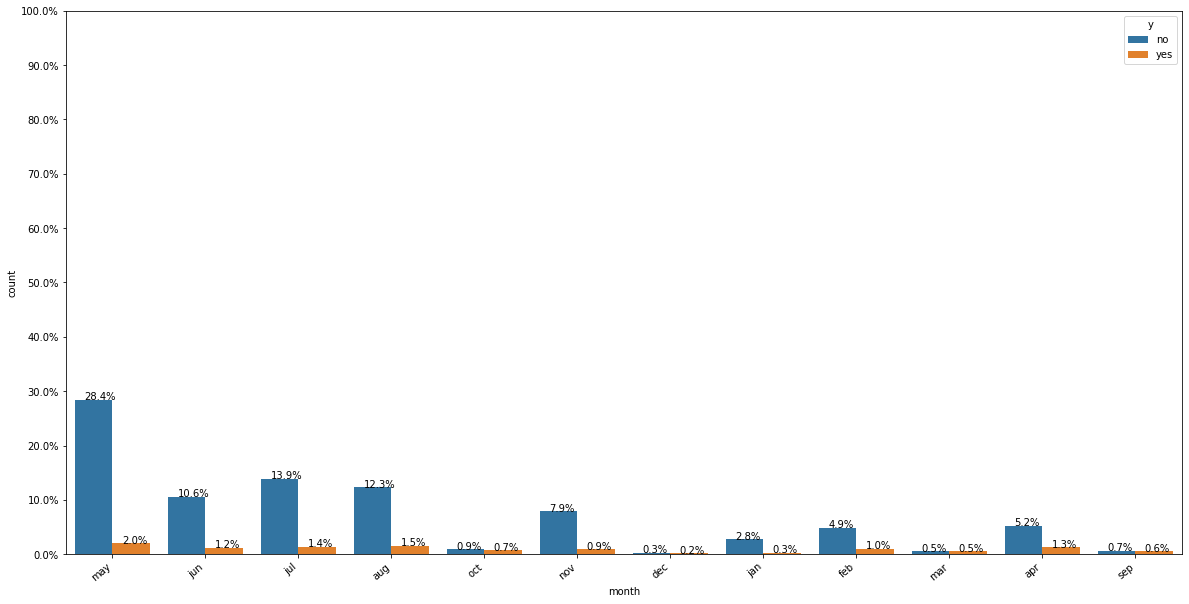

In [ ]:
countplot_withY("month", df)

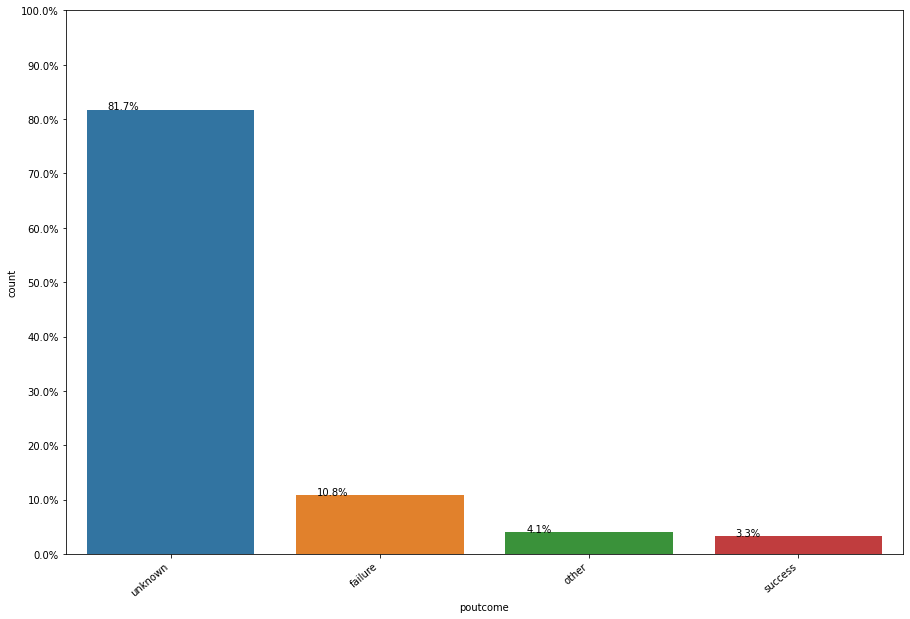

In [ ]:
countplot("poutcome", df)

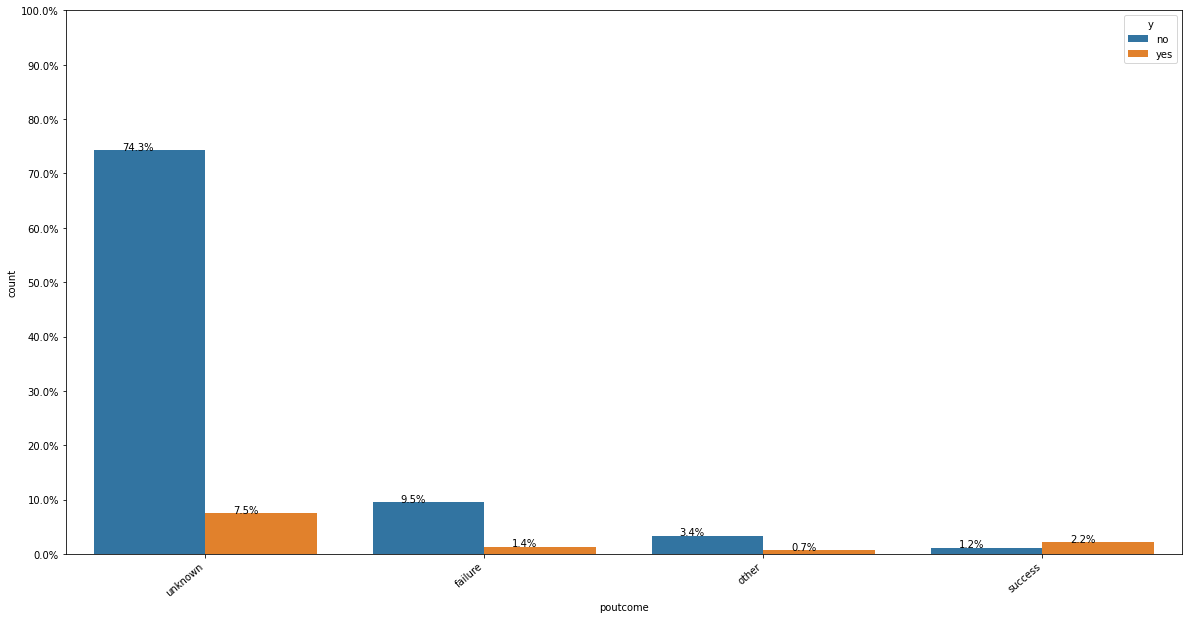

In [ ]:
countplot_withY("poutcome", df)

### Univariate Analysis of Numeric Variables

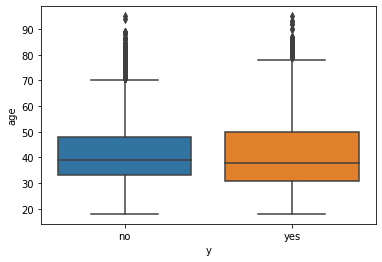

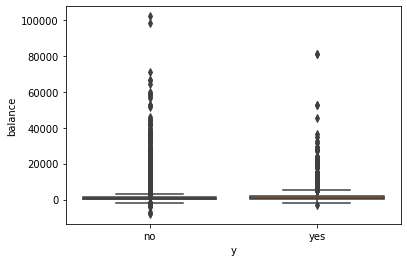

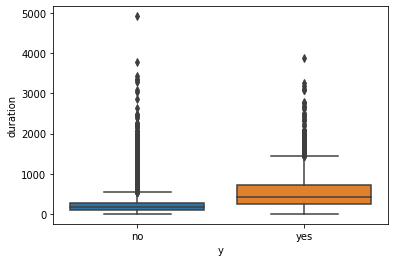

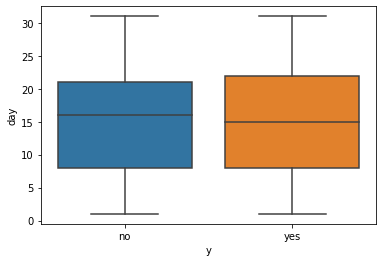

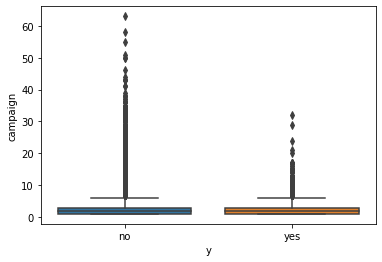

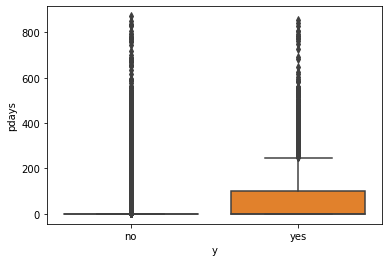

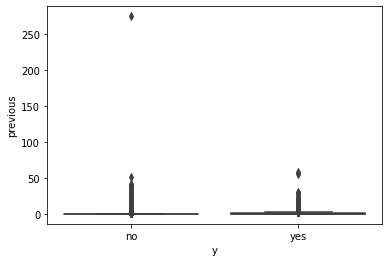

In [ ]:
#Exploratory Data Analysis
#for numerical variable
y1 = df['y']
num_var = ["age","balance","duration","day","campaign", "pdays", "previous"]

for i in num_var:
  sns.boxplot(x = y1,y = i,data = df)
  plt.show();

For both category of customers the median age is about 38-40. Boxplot for both the classes overlap quite a lot, which means that age isn't necessarily a good indicator for classifying customer.

As per above distribution, that most of the customers are in the age range of 30-40.

Duration (last contact duration) of a customer can be useful for predicting the target variable.

In [ ]:
df["pdays"].unique()

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [ ]:
df["pdays"].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

There are 36,954 cases of -1, which means that the most of the customers have never been contacted before.

In [ ]:
df["previous"].unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41])

In [ ]:
df["previous"].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

In [ ]:
df[df["y"]=="yes"]["previous"].value_counts()

0     3384
1      583
2      456
3      294
4      171
5      121
6       83
7       54
8       39
10      26
9       24
11      15
12      10
13       9
14       5
17       3
19       2
20       1
15       1
58       1
30       1
21       1
29       1
23       1
22       1
26       1
55       1
Name: previous, dtype: int64

In [ ]:
df[df["y"]=="no"]["previous"].value_counts()

0      33570
1       2189
2       1650
3        848
4        543
5        338
6        194
7        151
8         90
9         68
11        50
10        41
12        34
13        29
15        19
14        14
16        13
17        12
19         9
23         7
20         7
18         6
27         5
24         5
22         5
25         4
21         3
29         3
38         2
37         2
28         2
30         2
40         1
41         1
275        1
51         1
35         1
26         1
32         1
Name: previous, dtype: int64

## Correlation matrix of numerical features

Text(0.5, 1.05, 'Pearson correlation of Features')

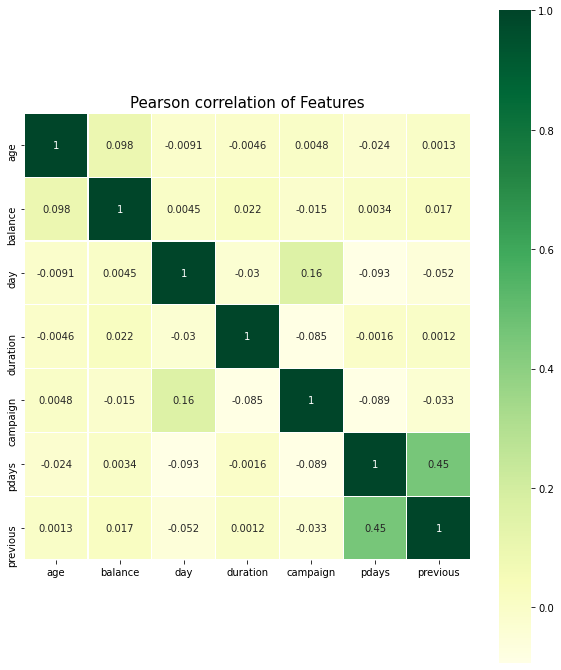

In [ ]:
%matplotlib inline
corr = df.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

There is a very weak correlation between features. The highest correlation is 0.45 between pdays and previouos features. 

## Data preparation 

1- Identify missing & Duplicated values 2- Data Formatting   3- Data Normalization  4- One-Hot Encoding

Data types were checked, the target variable was categorical. It was changed into a float variable. Also, all categorical variables were transformed by One-Hot Encoding. The missing values and duplicated variables were checked. There is not any duplicated or null values. The data set is split into the training and test set and it is normalized to get accurate results. To avid data leaking, the dataset first is divided into training and test sets and then it is normalized.
For developing the MLP models, the following data preparation steps were taken. Firstly, the data the target variable’s data type is changed to integer and values are replaced by 0 and 1. Secondly, all categorical variables are transformed by One-Hot Encoding. Thirdly, the standardScaler (Standard Normal Distribution) is used to normalize the data. This function standardizes features by making the mean equal to 0 and scaling the data to unit variance. 
Duration variable is dropped as in reality, this variable is known only after performing a direct marketing operation. So, we can’t use it in our model as its unknown before the research. 


In [ ]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

## Change output  variable to int 

In [ ]:
# Replace "no" with 0 and "yes" with 1
df["y"].replace(["yes","no"],[1,0], inplace=True)

In [ ]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

## One Hot Encoding Categorical features

In [ ]:
dummies = pd.get_dummies(df[['job','marital', 'education','default','housing','loan','contact','month','poutcome']])

In [ ]:
# Drop columns for which we created dummy variables
X_ = df.drop(['job', 'marital', 'education','default','housing','loan','contact','month','poutcome'], axis=1).astype('float64')

In [ ]:
# Define the feature set X.
df_new = pd.concat([dummies,X_], axis=1)
df_new.head()

job_admin.  job_blue-collar  job_entrepreneur  ...  pdays  previous    y
0           0                0                 0  ...   -1.0       0.0  0.0
1           0                0                 0  ...   -1.0       0.0  0.0
2           0                0                 1  ...   -1.0       0.0  0.0
3           0                1                 0  ...   -1.0       0.0  0.0
4           0                0                 0  ...   -1.0       0.0  0.0

[5 rows x 52 columns]

## Separate inpedendent and target variables


In [ ]:
data_X = df_new.iloc[:,:-1]
print("Shape of X:",data_X.shape)
data_y = df_new["y"]
print("Shape of Y:", data_y.shape)

Shape of X: (45211, 51)
Shape of Y: (45211,)


## Train Test split

The training set and test set were selected randomly by train_test_split function of sklearn model selection. 25% of data is allocated towards the Test dataset and 75% for the Training dataset.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.25, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (33908, 51) (33908,)
Test set: (11303, 51) (11303,)


## Normalize Data

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

scaler = StandardScaler()

normalized_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)


## Benchmark Selection - Logistic Regression 

One of the most famous algorithms for a binary classification case in supervised machine learning, is Logistic regression. In addition, we can get the probability of our prediction and we can understand the impact of each feature.

## Evaluation Metric

As we have an imbalanced dataset then the accuracy metrics do not work very well. Hence the AUC ROC score (Area Under the Receiver Operating Characteristics) is used as metrics.

AUC ROC score works very well when we have an imbalanced dataset. If we use accuracy as our metric, any random model can give us a very good accuracy but at the end, it will be a random model. AUC gets over this problem by looking into both the True positive rate (TPR) and False positive rate (FPR). Only if both the TPR and FPR are well above the random line in the ROC curve, we will get a good AUC. 

AUC - ROC score is an accuracy measurement for classification problem. ROC is a probability curve and AUC represent degree of separability. It indicates the model capability of distinguishing between classes. The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis. 

TPR= TP/(TP+FN)\
Specificity=TN/TN+FP \
FPR=1-Specificity

## Methodology

The two applied supervised machine learning models in this project are Decision Trees (DTs) and Random Forest. In compare to other data mining algorithms, Decision Trees can be built quickly. Friedman et al. (2001) showed that Decision Tress can easily handle mixed data (numeric and categorical predictor variables). Decision Trees are built by splitting the training set into distinct nodes where one node contains all or most one category of the dataset. At every section, the goal of algorithm is to diminish the entropy of the dependent variable. The advantages of this method are that 1-it can work with any type of data (numerical and categorical features), 2- requires little data pre-processing (does not require normalization of data, does not require scaling of data, missing values do not affect the process), 3-no assumptions is required about the shape of data and 4- they are very easy to explain and perfect for visual representation. The main disadvantage of Decision Tree is that they tend to overfit. Beucher et al. (2017) showed that Decision Trees are a strong technique for the redundant variables and for the missing data as well. Also, the research indicated that a Decision Tree is a stream chart like a progressive tree pattern, and it has three fundamental components. First component is the internal nodes which are corresponds to a test, second component is a branch which correspond to a result of that test and third component is a leaf node which assigns a classification. In this method the process is as follow: 1- an attribute is chosen 2- The significance of attribute in splitting of data is calculated 3- Data is split based on the value of best attribute 4- Go back to step 1. 

Random forest is a flexible and easy to use supervised learning algorithm which usually produces, even without hyper-parameter tuning, a great result. Friedman et al. (2001) showed that Random Forests starts to stabilize at about 200 trees, while at 1000 trees the boosting of this keeps on improving. It works same as the decision tree algorithm, although it performs a variety of decision tree analysis on the whole dataset. Therefore, it is the bigger version of the decision tree. It has almost the same hyperparameters as a decision tree or a bagging classifier. Random forest develops multiple decision trees and combines them together to make a more accurate prediction. The main advantage of the Random Forest is that it can be utilized for both classification and regression problems. It adds extra randomness to the model, as growing the trees. When Random Forest splits a node, it searches for the best feature among a random subset of features, which results in a wide diversity and a better model. Hence for splitting a node, just a random subset of the features is taken into consideration. Another great feature of the random forest is that the relative importance of each predictor can be measured easily. The main difference between Random Forest and Decision Tree is that Decision Tree formulates some set of rules and use them to make the predictions, but the random forest algorithm randomly selects observations and features to make several decision trees and then averages the results. Another difference is that Decision Trees could suffer from overfitting but in comparison Random Forest avoids that by developing random subsets of the features and making smaller trees using those subsets. Then, it combines the subtrees. Although, this method doesn’t work every time and it could make the computation slower.

So, we can summarize advantages of random forest as follows: 1- It can be used for both regression and classification, 2- It’s also easy to check the relative importance it assigns to each feature, 3- It is also a handy method as the default hyperparameters often create a reasonable prediction result. 4- the hyperparameters are easy to be understood, 5- overfitting does not happen to Ranodm Forest (If there are enough trees in the forest). The main disadvantage of random forest is that it could be too slow and ineffective for real-time predictions if there are many trees. To produce an accurate prediction, we need more trees, which results in a slower model. Another limitation is that it is a predictive modelling tool and not a descriptive tool. Random Forest is appropriate for situations when there is a large dataset, and interpretability is not a major concern. Decision trees are easier to understand and interpret. As random forest merges multiple decision trees together, it gets more challenging to interpret. Random Forest may not perform well if we there is a large dimensional data and categorical features with many categories. When we use Random Forests on classification dataset, we are usually using the Gini index to decide how nodes on a decision tree branch.

Artificial Neural Network (ANN) is broadly used in different machine learning problems such as classification and prediction, especially when the dataset contains continuous variables possibly too noisy. ANN contains many neurons which are arranged in a few layers. Neurons are the processing units, and they are updated with values based on a specific function. Multilayer Perceptron (MLP) is a set of interconnected neurons and it is one of the most popular neural networks. It usually includes three layers of neurons totally connected, which are the input, hidden and output layers. MLP can solve nonlinearly separable problems and complex logical problems. The first layer is the input layer and the input cell just receive in input the values of attributes. The output layer is the last layer of the neural network which have one or more decision cells. The layers between the input and the output layers are the hidden layers. MLP can have one or more hidden layers. The main specification of MLP is that in each layer, the neurons are the entries for neuron in the next layer. In this project, there are 15 input variables and they are fully connected to a hidden layer. Also, the output layer has two neurons.

The main advantage of neural networks is their significant ability to derive meaning from complicated data, and they can be utilized to extract patterns and detect trends that are too complicated to be identified by other techniques. Also, they can learn how to do tasks according to the training data. After training a neural network, it can be employed to predict outputs for instance with unseen input. The main disadvantages of neural networks are that they need processors with parallel processing power. In addition, the functioning of the network is not explainable which reduce the trust in the model. Furthermore, there is no definite rule for building an artificial neural network and the appropriate structure is attained by experience and trial and error.

## Hyperparameters

For the decision tree, variuos max_depth and min_samples_split were tested. The max_depth is None by default and it indicated the maximum number of layers the tree will have. When None, the layers will continue until a pure split is achieved or another min/max parameter is achieved. The min_samples_split which is 2 by default indicates the minimum number of samples in an internal node which allows for a split to occur. If a node has less than this number if becomes a leaf (terminal node). One of the important hyperparameters for random forest is the number of trees (n_estimators) hyperparameter which is the number of trees the algorithm creates before getting the averages of predictions. Preferably, this should be increased till no further improvement is seen. Overall, a greater number of trees improves the performance, but it slows down the computation.

For the MPL models, the number of layers and the number of neurons in each hidden layer were used as the hyperparametera. 3 models were built in this section. The first model was a 3-layer neural network with 1 hidden layer) and hidden layer had 16 neurons. The second model was built with 2 hidden layers and again 16 neurons in each hidden layer. The third model was a 4-layer neural network with 128 neurons in each hidden layer. The ReLU activation function was used for the hidden layers and Sigmoid activation function was used for classifying the results.

Grid search is used for hyperparameter tuning by using GridSearchCV. For the the max_depth the following numbers were tested :1,2,3,4,5,10,50,100,500,1000 and for the min_samples_split the following numbers: 2,5,10, 100, 500. The following numbers were tested: 20, 40, 60, 80, 100, 120. The n_jobs hyperparameter indicates the engine how many processors it is allowed to use. A value of “-1” means that there is no limit. Finally, the following numbers were tested for the maximum depth: 1, 5, 10, 50, 100, 500, 1000.

For the MLP models, the first model was a 3-layer neural network with 1 hidden layer) and hidden layer had 16 neurons. The second model was built with 2 hidden layers and again 16 neurons in each hidden layer. The third model was a 4-layer neural network with 128 neurons in each hidden layer. The ReLU activation function was used for the hidden layers and Sigmoid activation function was used for classifying the results.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear' , class_weight='balanced').fit(normalized_X_train,y_train)

normalized_X_test= pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

yhat= LR.predict(normalized_X_test)
yhat_proba = LR.predict_proba(normalized_X_test)

## Evaluation

In [ ]:
from sklearn.metrics import roc_auc_score
print("AUC Score with Duration Variable: ", roc_auc_score(y_test, yhat_proba[:,1]))

AUC Score with Duration Variable:  0.9066166088219756


## Drop Duration Variable

In [ ]:
X_train = X_train.drop("duration", axis=1)
print("The shape of the train dataset: ", X_train.shape)

X_test = X_test.drop("duration", axis=1)
print("The shape of the test dataset: ", X_test.shape)

The shape of the train dataset:  (33908, 50)
The shape of the test dataset:  (11303, 50)


## Fit the model without Duration Variable

In [ ]:
normalized_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
LR2 = LogisticRegression(C=0.01, solver='liblinear',class_weight='balanced').fit(normalized_X_train,y_train)
normalized_X_test= pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
yhat= LR2.predict(normalized_X_test)
yhat_proba_LR = LR2.predict_proba(normalized_X_test)
pred_train_LR = LR2.predict_proba(normalized_X_train)

print("AUC score without Duration on Test Dataset ", roc_auc_score(y_test, yhat_proba_LR[:,1]))
print("AUC score without Duration on Train Dataset ", roc_auc_score(y_train, pred_train_LR[:,1]))



AUC score without Duration on Test Dataset  0.7694305359532508
AUC score without Duration on Train Dataset  0.7687110382401667


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [ ]:
decisionTree.fit(normalized_X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predTree_proba = decisionTree.predict_proba(normalized_X_test)

In [ ]:
print("AUC Score", roc_auc_score(y_test, predTree_proba[:,1]))

AUC Score 0.7177910278223899


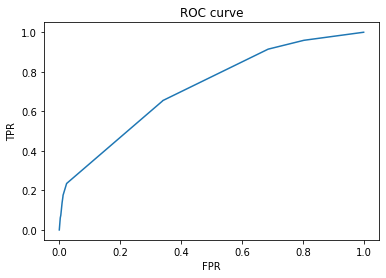

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

fpr, tpr, _ = roc_curve(y_test, predTree_proba[:,1])

plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## Decision Tree - Hyperparameter Tuning 

max_depth: (default = None) the maximum number of layers your tree will have. When None, the layers will continue until a pure split is achieved or another min/max parameter is achieved.

min_samples_split: (default = 2) the minimum number of samples in an internal node that allows for a split to occur. If a node has less than this number if becomes a leaf (terminal node).

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1,2,3,4,5,10,50,100,500,1000]
min_samples =  [2,5,10, 100, 500]
param_grid={'min_samples_split':min_samples , 'max_depth':dept}
clf = DecisionTreeClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(normalized_X_train,y_train)
print("optimal min_samples_split",model.best_estimator_.min_samples_split)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal min_samples_split 500
optimal max_depth 50


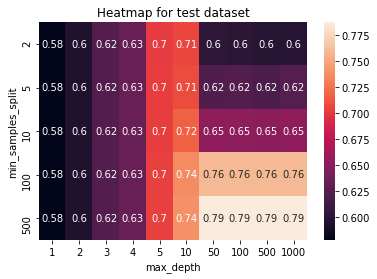

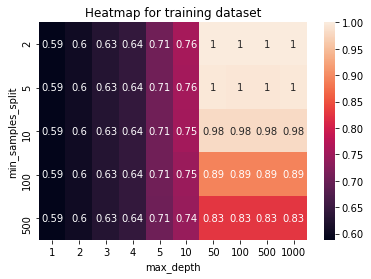

In [ ]:
import seaborn as sns
X = []
Y = []
cv_auc = []
train_auc = []
for n in min_samples:
    for d in dept:
        clf = DecisionTreeClassifier(max_depth = d,min_samples_split = n)
        clf.fit(normalized_X_train,y_train)
        pred_cv = clf.predict_proba(normalized_X_test)[:,1]
        pred_train = clf.predict_proba(normalized_X_train)[:,1]
        X.append(n)
        Y.append(d)
        cv_auc.append(roc_auc_score(y_test,pred_cv))
        train_auc.append(roc_auc_score(y_train,pred_train))
        
#Heatmap for cross validation data        
data = pd.DataFrame({'min_samples_split': X, 'max_depth': Y, 'AUC': cv_auc})
data_pivoted = data.pivot("min_samples_split", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for test dataset')
plt.show()

#Heatmap for training data
data = pd.DataFrame({'min_samples_split': X, 'max_depth': Y, 'AUC': train_auc})
data_pivoted = data.pivot("min_samples_split", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for training dataset')
plt.show()


In [ ]:
optimal_n_estimators_DT = model.best_estimator_.min_samples_split
optimal_max_depth_DT = model.best_estimator_.max_depth


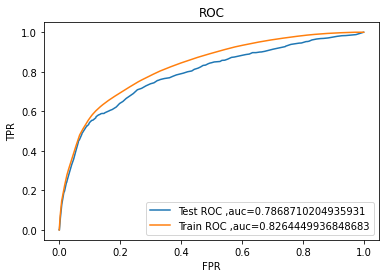

AUC on Test data is 0.7868710204935931
AUC on Train data is 0.8264449936848683
---------------------------


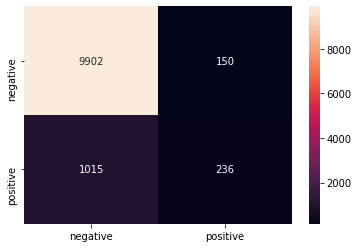

In [ ]:
#training our model for max_depth=50,min_samples_split=500
import sklearn.metrics as metrics
clf = DecisionTreeClassifier(max_depth = optimal_max_depth_DT ,min_samples_split = optimal_n_estimators_DT)
clf.fit(normalized_X_train,y_train)
pred_test_DT =clf.predict_proba(normalized_X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test_DT)
pred_train_DT = clf.predict_proba(normalized_X_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred_train_DT)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test, pred_test_DT)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train_DT)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test, pred_test_DT)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train_DT)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test_DT.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

## Random Forest



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]

param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = RandomForestClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(normalized_X_train,y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal n_estimators 120
optimal max_depth 10


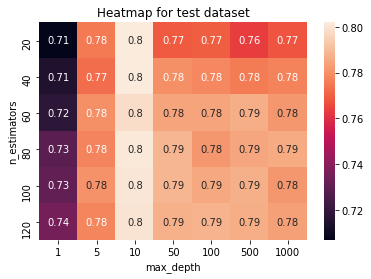

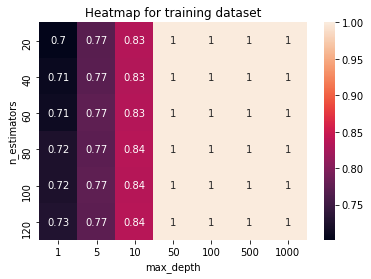

In [ ]:
import seaborn as sns
X = []
Y = []
cv_auc = []
train_auc = []
for n in n_estimators:
    for d in dept:
        clf = RandomForestClassifier(max_depth = d,n_estimators = n)
        clf.fit(normalized_X_train,y_train)
        pred_cv = clf.predict_proba(normalized_X_test)[:,1]
        pred_train = clf.predict_proba(normalized_X_train)[:,1]
        X.append(n)
        Y.append(d)
        cv_auc.append(roc_auc_score(y_test,pred_cv))
        train_auc.append(roc_auc_score(y_train,pred_train))
        
#Heatmap for cross validation data        
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': cv_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for test dataset')
plt.show()

#Heatmap for training data
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': train_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for training dataset')
plt.show()


In [ ]:
optimal_n_estimators_RF = model.best_estimator_.n_estimators
optimal_max_depth_RF = model.best_estimator_.max_depth

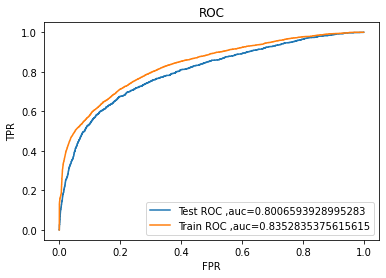

AUC on Test data is 0.8006593928995283
AUC on Train data is 0.8352835375615615
---------------------------


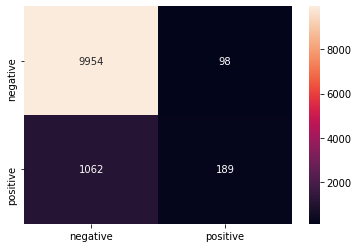

In [ ]:
#training our model for max_depth=10,n_estimators = 120
clf = RandomForestClassifier(max_depth = optimal_max_depth_RF,n_estimators = optimal_n_estimators_RF)
clf.fit(normalized_X_train,y_train)
pred_test_RF =clf.predict_proba(normalized_X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test_RF)
pred_train_RF = clf.predict_proba(normalized_X_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred_train_RF)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test_RF)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train_RF)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test_RF)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train_RF)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test_RF.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

## MLP

In [ ]:
import tensorflow as tf 

In [ ]:
#Let's see how well the neural network performs this classification task
#we will start with a basic 3 layer neural network with 16 neurons
nw = models.Sequential()

#add layers to model
nw.add(layers.Dense(16, activation='relu', input_shape=(50,)))
nw.add(layers.Dense(1, activation='sigmoid'))
nw.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                816       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#roc auc score
def auroc(y_true, y_pred):
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)

# compile model using adam for the optimizer and binary_crossentropy as the loss function
nw.compile(optimizer='adam',
          loss='binary_crossentropy',#using binary cross entropy since y is binary
         metrics=['accuracy', auroc])


In [ ]:
#lets fit the data to the neural net run 10 epochs, 512 batch size, 
nw.fit(normalized_X_train,y_train, epochs=10,batch_size=512,validation_data=(normalized_X_test, y_test))

Epoch 1/10
67/67 [==============================] - 2s 13ms/step - loss: 0.5410 - accuracy: 0.7614 - auroc: 0.4958 - val_loss: 0.3605 - val_accuracy: 0.8829 - val_auroc: 0.6484
Epoch 2/10
67/67 [==============================] - 0s 6ms/step - loss: 0.3523 - accuracy: 0.8820 - auroc: 0.6755 - val_loss: 0.3116 - val_accuracy: 0.8911 - val_auroc: 0.7214
Epoch 3/10
67/67 [==============================] - 0s 6ms/step - loss: 0.3240 - accuracy: 0.8840 - auroc: 0.7406 - val_loss: 0.2991 - val_accuracy: 0.8948 - val_auroc: 0.7416
Epoch 4/10
67/67 [==============================] - 0s 6ms/step - loss: 0.3111 - accuracy: 0.8902 - auroc: 0.7512 - val_loss: 0.2948 - val_accuracy: 0.8947 - val_auroc: 0.7500
Epoch 5/10
67/67 [==============================] - 0s 6ms/step - loss: 0.3079 - accuracy: 0.8884 - auroc: 0.7572 - val_loss: 0.2925 - val_accuracy: 0.8952 - val_auroc: 0.7532
Epoch 6/10
67/67 [==============================] - 0s 6ms/step - loss: 0.3046 - accuracy: 0.8891 - auroc: 0.7659 - val

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


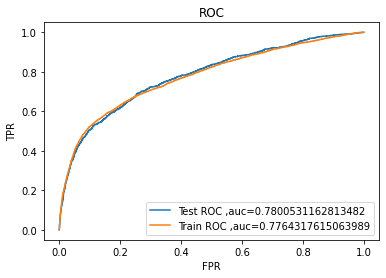

AUC on Test data is 0.7800531162813482
AUC on Train data is 0.7764317615063989
---------------------------


In [ ]:
pred_test_mlp1 =nw.predict_proba(normalized_X_test)[:,0]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test_mlp1)
pred_train_mlp1 = nw.predict_proba(normalized_X_train)
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred_train_mlp1)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test, pred_test_mlp1)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train_mlp1)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test, pred_test_mlp1)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train_mlp1)))

print("---------------------------")

In [ ]:
#lets try to increase layers to 4
nw = models.Sequential()

#add layers to model
nw.add(layers.Dense(16, activation='relu', input_shape=(50,)))
nw.add(layers.Dense(16, activation='relu'))
nw.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
def auroc(y_true, y_pred):
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)

#compile model using adam for the optimizer and binary_crossentropy as the loss function
nw.compile(optimizer='adam',
          loss='binary_crossentropy',#using binary cross entropy since y is binary
          metrics=['accuracy', auroc])

In [ ]:
nw.fit(normalized_X_train, y_train, epochs=10, batch_size=512, validation_data=(normalized_X_test, y_test))

Epoch 1/10
67/67 [==============================] - 1s 9ms/step - loss: 0.5747 - accuracy: 0.7309 - auroc: 0.4439 - val_loss: 0.3517 - val_accuracy: 0.8890 - val_auroc: 0.6067
Epoch 2/10
67/67 [==============================] - 0s 6ms/step - loss: 0.3480 - accuracy: 0.8835 - auroc: 0.6568 - val_loss: 0.3088 - val_accuracy: 0.8937 - val_auroc: 0.7133
Epoch 3/10
67/67 [==============================] - 0s 6ms/step - loss: 0.3130 - accuracy: 0.8892 - auroc: 0.7453 - val_loss: 0.2982 - val_accuracy: 0.8948 - val_auroc: 0.7349
Epoch 4/10
67/67 [==============================] - 0s 6ms/step - loss: 0.3068 - accuracy: 0.8913 - auroc: 0.7528 - val_loss: 0.2935 - val_accuracy: 0.8959 - val_auroc: 0.7445
Epoch 5/10
67/67 [==============================] - 0s 6ms/step - loss: 0.2998 - accuracy: 0.8935 - auroc: 0.7669 - val_loss: 0.2911 - val_accuracy: 0.8969 - val_auroc: 0.7511
Epoch 6/10
67/67 [==============================] - 0s 6ms/step - loss: 0.3047 - accuracy: 0.8901 - auroc: 0.7685 - val_

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


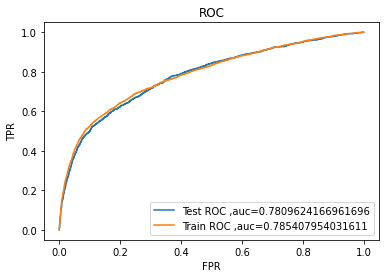

AUC on Test data is 0.7809624166961696
AUC on Train data is 0.785407954031611
---------------------------


In [ ]:
pred_test_mlp2 =nw.predict_proba(normalized_X_test)[:,0]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test_mlp2)
pred_train_mlp2 = nw.predict_proba(normalized_X_train)
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred_train_mlp2)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test, pred_test_mlp2)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train_mlp2)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test, pred_test_mlp2)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train_mlp2)))

print("---------------------------")

In [ ]:
#lets try to increase neurons to 128
nw = models.Sequential()

#add layers to model
nw.add(layers.Dense(128, activation='relu', input_shape=(50,)))
nw.add(layers.Dense(128, activation='relu'))
nw.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
#compile model using adam for the optimizer and binary_crossentropy as the loss function
nw.compile(optimizer='adam',
          loss='binary_crossentropy',#using binary cross entropy since y is binary
          metrics=['accuracy', auroc])

In [ ]:
nw.fit(normalized_X_train, y_train, epochs=10, batch_size=512, validation_data=(normalized_X_test, y_test))

Epoch 1/10
67/67 [==============================] - 1s 10ms/step - loss: 0.3964 - accuracy: 0.8675 - auroc: 0.5934 - val_loss: 0.2923 - val_accuracy: 0.8943 - val_auroc: 0.7567
Epoch 2/10
67/67 [==============================] - 0s 6ms/step - loss: 0.3018 - accuracy: 0.8920 - auroc: 0.7699 - val_loss: 0.2862 - val_accuracy: 0.8960 - val_auroc: 0.7663
Epoch 3/10
67/67 [==============================] - 0s 6ms/step - loss: 0.2932 - accuracy: 0.8917 - auroc: 0.7955 - val_loss: 0.2851 - val_accuracy: 0.8964 - val_auroc: 0.7704
Epoch 4/10
67/67 [==============================] - 0s 6ms/step - loss: 0.2869 - accuracy: 0.8955 - auroc: 0.8008 - val_loss: 0.2846 - val_accuracy: 0.8976 - val_auroc: 0.7680
Epoch 5/10
67/67 [==============================] - 0s 6ms/step - loss: 0.2867 - accuracy: 0.8955 - auroc: 0.8001 - val_loss: 0.2834 - val_accuracy: 0.8983 - val_auroc: 0.7704
Epoch 6/10
67/67 [==============================] - 0s 6ms/step - loss: 0.2846 - accuracy: 0.8960 - auroc: 0.8062 - val

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


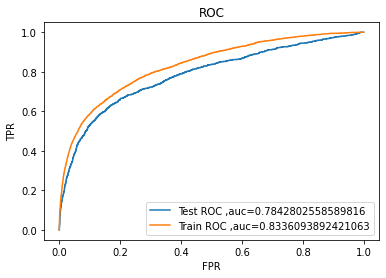

AUC on Test data is 0.7842802558589816
AUC on Train data is 0.8336093892421063
---------------------------


In [ ]:
pred_test_mlp3 = nw.predict_proba(normalized_X_test)[:,0]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test_mlp3)
pred_train_mlp3 = nw.predict_proba(normalized_X_train)
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred_train_mlp3)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test, pred_test_mlp3)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train_mlp3)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test, pred_test_mlp3)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train_mlp3)))

print("---------------------------")

## Important features

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = optimal_max_depth_RF, random_state = 42)
rf.fit(normalized_X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = normalized_X_train.columns,
                                  columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

importance
poutcome_success    0.226714
age                 0.081267
pdays               0.070537
balance             0.050986
day                 0.045974

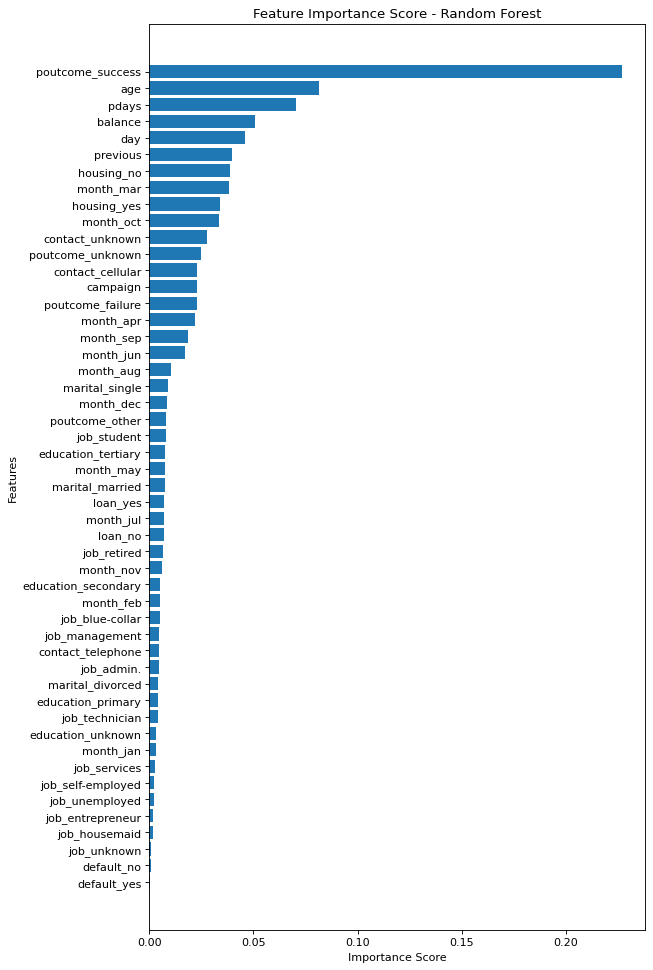

In [ ]:
num = np.min([50, len(normalized_X_train.columns)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()


## Table of Results

In [ ]:
results=pd.DataFrame(columns=['Model', 'Classifier' ,"Hyper Parameter", 'Train-AUC', 'Test-AUC' ])

In [ ]:
results.loc[0] = ['Logistic Regression','LogisticRegression',"C=0.01",roc_auc_score(y_train, pred_train_LR[:,1]),roc_auc_score(y_test, yhat_proba_LR[:,1])]
results.loc[1] = ['Decision Tree','DecisionTreeClassifier','max_depth = 50 & min_samples_split= 500' ,roc_auc_score(y_train,pred_train_DT),roc_auc_score(y_test, pred_test_DT)]
results.loc[2] = ['Random Forest','RandomForestClassifier',"max_depth=10 & min_samples_split = 120",roc_auc_score(y_train,pred_train_RF),roc_auc_score(y_test, pred_test_RF)]
results.loc[3] = ['3-layers','1 Hidden Layers ',"16 Neurons",roc_auc_score(y_train,pred_train_mlp1),roc_auc_score(y_test, pred_test_mlp1)]
results.loc[4] = ['4-layers','2 Hidden Layers',"16 Neurons",roc_auc_score(y_train,pred_train_mlp2),roc_auc_score(y_test, pred_test_mlp2)]
results.loc[5] = ['4-layers','2 Hidden Layers',"128 Neurons",roc_auc_score(y_train,pred_train_mlp3),roc_auc_score(y_test, pred_test_mlp3)]
results



Model              Classifier  ... Train-AUC  Test-AUC
0  Logistic Regression      LogisticRegression  ...  0.768711  0.769431
1        Decision Tree  DecisionTreeClassifier  ...  0.826445  0.786871
3             3-layers        1 Hidden Layers   ...  0.776432  0.780053
4             4-layers         2 Hidden Layers  ...  0.785408  0.780962
5             4-layers         2 Hidden Layers  ...  0.833609  0.784280
2        Random Forest  RandomForestClassifier  ...  0.835284  0.800659

[6 rows x 5 columns]

The Random Forest model produce the best accuracy with max_depth=10 and min_samples_split=120. It produces 0.8025 AUC on test data set.

The benchmark was Logistic regression and it produced 0.7694 AUC on Test dataset. By utilizing the Random Forest and hyper tuning the parameters, the 0.8025 AUC was achieved. So, the hyper tuning results a better performance.

The best MLP model was a 4-layer MLP with 128 neurons in each hidden layer. It produced

As the number of layers and number of neurons in each hidden layer were increased, the accuracy of the model on the test dataset was improved. The initial accuracy for a 3-layer model was 0.7817 and by tuning the hyperparameters, it was increased to 0.7896. The best MLP model was a 4-layer neural network with 2 hidden layers and 128 neurons in each layer which produced 0.7896 on the test dataset.



# Unsupervised Machine Learning - Autoencoder


In this project, an autoencoder will be used to reduce the dimension of the data which is an unsupervised learning method. In this method, a bottleneck is imposed in the neural network which forces a compressed knowledge representation (encoding) of the raw input. This method can be considered as a generalization of PCA technique. The PCA method tries to find a lower dimensional hyperplane which defines the raw data, but autoencoders are capable of learning nonlinear manifolds. In this project, the PCA and autoencoder methods will be applied on the data set to extract the features. The outcome of both methods will be compared and visualized. Also, K-means clustering method will be applied on the outcome of the PCA and autoencoder methods and results will be visualized.  Finally, different samples (10%, 25%, 50%, 75%, 100%) of training data will be extracted and random forest will be used to train a supervised classifier on the outcome of the PCA and autoencoder methods and the accuracy will be evaluated. 

### Literature Review
Akrami, H., et al. (2020), proposed a variational autoencoder (VAE) with β divergence for tabular data sets which have different type of variables (continuous and categorical). Variational autoencoders are one of the most popular techniques for anomaly detection. Usually the training data have outliers which could be a random noise come from data collection process) or other sources and this can decrease the accuracy of the model. They showed that the proposed technique is robust to outliers in training data and showed how to use β divergence in a variational autoencoders context for tabular datasets. 

Mancisidor, R. A., et al. (2019) utilized the VAE technique and showed that it is possible to direct the latent representations using the Weight of Evidence and developing a particular combination of the data that indicates the customers’ credit worthiness. The proposed method can improve many processes in credit risk assessment in retail banks such as marketing campaigns, customer relationship management. Their proposed method learn a latent representation of the data and can generalizes to new customers. 


In order to train the autoencoder, we need to use a reconstruction loss. Hence, Mean Squared Error (MSE) is an excellent evaluation metrics. The loss functions are utilized to gauge the error between the target value and predicted values. The goal of a machine learning model is to find the point that minimizes loss function. The L2 Loss function minimizes the average of the squared differences between actual values and predicted values. We use the MSELoss() to calculate the MSE. This function produces a criterion that calculates the MSE in squared L2 norm between each element in input and output. The L2 loss is vulnerable to outliers but gives a more stable and closed form solution.  

### Advantages and Disadvantages of The Algorithms. 
Clustering: The main advantages of this method is that it is simple to implement, could be scale to large data sets, it guarantees convergence and could generalizes to different shapes and sizes. The disadvantages of this K-means is that it discovers a local minimum of the cost function and cluster assignments may not be optima, the number of clusters must be chosen manually, it has problem clustering data where clusters have different sizes and density and centroids could be dragged by outliers, or outliers could get their own cluster instead of being ignored. 

Principal Component Analysis (PCA): the main advantages of this model are that it removes correlated variables, improves algorithm accuracy, and reduces overfitting. The main disadvantages of this model are that the independent variables become less interpretable, the information loss could occur, and it only extracts linear derived features. 

Autoencoders: using them could be good for feature extraction, could improve performance and produce a model based on the data instead of predefined filters. The main downside is the additional computation time. The autoencoders must be trained and hyperparameters must be tuned. In addition, the model must be validated before it can start building the real model. An autoencoder understands to obtain as much information as possible instead of as much relevant information as possible. So, if the relevant information to the problem is a small part of the input then the autoencoder may lose a lot of it. Finally, they destroy any interpretability. 


### Why did I choose them over other existing algorithms? 
Data clustering (Jain, A. K., et al. (1999)) is one of the most popular unsupervised machines learning methods whose objective is clustering similar data into the same group. One of the mostly used processing techniques in clustering is linear and non-linear data transformations. Usually, they are helpful to improving data visualisation but if dataset have a complex structure, then these techniques could be unproductive for clustering. Song, C., et al. (2013). showed that auto-encoder based data clustering model accomplishes excellent performance accuracy.

### Training and Hyperparameter Tuning
Different number of hidden layers and nodes was selected randomly and manually. Specifically, 3 neural networks were tested in this question. In the first model encoder has 2 hidden layers and latent variable of size 2, the second model encoder has latent variable of size 8 and has 2 hidden layers. The third model has 3 hidden layers and has latent variable of size 2. In addition, they have different number of nodes in each hidden layers. 

### Data Preparation 
For developing the autoencoder models, the following data preparation steps were taken: 1- The target variable’s data type was changed to integer and values were replaces by 0 and 1. 2- All categorical variables were transformed by One-Hot Encoding. 3- X and y data set were selected, and data type were changed to numpy. 4- X dataset was reshaped, and data type was changed to float32.  5-The StandardScaler (Standard Normal Distribution) was used to normalize the data. This function standardizes features by making the mean equal to 0 and scaling the data to unit variance. 6- The data set was split into the training and test set. 7- Tensors were developed for the train and test datasets. 
Discuss the feature selection or feature engineering methods for autoencoder. 
Duration variable was dropped as in reality, this variable is known only after performing a direct marketing operation. So, we can’t use it in our model as its unknown before the research. One Hot encoding was used to turn categorical variables into numeric variables. Also, X and y data sets were selected and their data types were changed to numpy. Furethomre, X dataset was reshaped.Firnally, tensors were created for train and test datasets.

### Hyperparameter Tuning:
Different number of hidden layers and nodes was selected randomly and manually. Specifically, 3 neural networks were tested in this question. In the first model encoder has 2 hidden layers and latent variable of size 2, the second model encoder has latent variable of size 8 and has 2 hidden layers. The third model has 3 hidden layers and has latent variable of size 2. In addition, they have different number of nodes in each hidden layers. 



In [ ]:
df_new.head()

job_admin.  job_blue-collar  job_entrepreneur  ...  pdays  previous    y
0           0                0                 0  ...   -1.0       0.0  0.0
1           0                0                 0  ...   -1.0       0.0  0.0
2           0                0                 1  ...   -1.0       0.0  0.0
3           0                1                 0  ...   -1.0       0.0  0.0
4           0                0                 0  ...   -1.0       0.0  0.0

[5 rows x 52 columns]

In [ ]:
dataframe = df_new.drop("duration", axis=1)
dataframe

job_admin.  job_blue-collar  job_entrepreneur  ...  pdays  previous    y
0               0                0                 0  ...   -1.0       0.0  0.0
1               0                0                 0  ...   -1.0       0.0  0.0
2               0                0                 1  ...   -1.0       0.0  0.0
3               0                1                 0  ...   -1.0       0.0  0.0
4               0                0                 0  ...   -1.0       0.0  0.0
...           ...              ...               ...  ...    ...       ...  ...
45206           0                0                 0  ...   -1.0       0.0  1.0
45207           0                0                 0  ...   -1.0       0.0  1.0
45208           0                0                 0  ...  184.0       3.0  1.0
45209           0                1                 0  ...   -1.0       0.0  0.0
45210           0                0                 1  ...  188.0      11.0  0.0

[45211 rows x 51 columns]

In [ ]:
dataframe.dtypes

job_admin.               uint8
job_blue-collar          uint8
job_entrepreneur         uint8
job_housemaid            uint8
job_management           uint8
job_retired              uint8
job_self-employed        uint8
job_services             uint8
job_student              uint8
job_technician           uint8
job_unemployed           uint8
job_unknown              uint8
marital_divorced         uint8
marital_married          uint8
marital_single           uint8
education_primary        uint8
education_secondary      uint8
education_tertiary       uint8
education_unknown        uint8
default_no               uint8
default_yes              uint8
housing_no               uint8
housing_yes              uint8
loan_no                  uint8
loan_yes                 uint8
contact_cellular         uint8
contact_telephone        uint8
contact_unknown          uint8
month_apr                uint8
month_aug                uint8
month_dec                uint8
month_feb                uint8
month_ja

In [ ]:
X = dataframe.drop(['y'],axis=1).to_numpy()
y = dataframe['y'].to_numpy()
print(X.shape)
print(y.shape)

(45211, 50)
(45211,)


In [ ]:
X=X.reshape(-1, X.shape[1]).astype('float32')
print(X.shape)

(45211, 50)


In [ ]:
from sklearn import preprocessing
standardizer = preprocessing.StandardScaler()
X = standardizer.fit_transform(X) 

In [ ]:
#split train and test sets
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size =.8, test_size=.2,
                                                    random_state=42, stratify=y)
#we stratified data by output feature variable 'y' to ensure even spread of data in both data sets

In [ ]:
train_X = torch.tensor(train_X,dtype=torch.float32)
train_y = torch.tensor(train_y,dtype=torch.long)

test_X1 = torch.tensor(test_X,dtype=torch.float32)
test_y1 = torch.tensor(test_y,dtype=torch.long)

In [ ]:
train_X.shape

torch.Size([36168, 50])

In [ ]:
train_y.shape

torch.Size([36168])

In [ ]:
Encoder = nn.Sequential(nn.Linear(50, 40),
                      nn.ReLU(),
                      nn.Linear(40, 30),
                      nn.ReLU(),
                      nn.Linear(30, 20),
                      nn.ReLU(),
                      nn.Linear(20, 2))

Decoder = nn.Sequential(nn.Linear(2, 20),
                      nn.ReLU(),
                      nn.Linear(20, 30),
                      nn.ReLU(),
                      nn.Linear(30, 40),
                      nn.ReLU(),
                      nn.Linear(40, 50),
                      nn.Sigmoid())

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Encoder = Encoder.to(device)
Decoder = Decoder.to(device)


optimizer = optim.Adam(list(Encoder.parameters()) + list(Decoder.parameters()))
loss_function = nn.MSELoss()

In [ ]:
running_loss = []
for iteration in range(10000**100):
  
  Encoder.train()
  Decoder.train()

  random_indexes = np.random.choice(range(0,len(train_y)),128)

  x_train = Variable(np.take(train_X,random_indexes,0)).to(device)
  
  optimizer.zero_grad()

  latent_variable = Encoder(x_train)
  recon_input = Decoder(latent_variable)

  loss = loss_function(recon_input, x_train)

  loss.backward()
  
  optimizer.step()

  running_loss.append(loss.item())
  

  if iteration%1000 == 0:
    r_loss = sum(running_loss)/len(running_loss)
    print (r_loss)
    running_loss = []

1.2260574102401733
0.9676443009972572
0.9122100114226341
0.9096323104500771
0.9073284496665001
0.9112741160988808
0.9073146720528602
0.9070023252367974
0.9056856736540795
0.9017301645278931
0.9028883250951767
0.9023576998710632
0.8944852219223977
0.9020119432210922
0.9143607866764069
0.9022304353713989
0.9065227423906326
0.9002978345155715
0.9011030944585801
0.9029565936326981
0.8980779602527619
0.8969079012274742
0.9042622722387313
0.9042671905755997
0.8999144876599312
0.9035056863427162
0.8985838413834571
0.9098983067274093
0.9019228718280792
0.8994800060391426
0.8954744926691055
0.8956953090429306
0.8982706679701805
0.8940589538812638
0.8999743900895119
0.8960061740875244
0.8990822104811669
0.8940248132348061
0.9032309501767158
0.894138544857502
0.8947088675498962
0.9023512509465218
0.8959907190799713
0.9052208938002586
0.9024154710769653
0.894268306016922
0.8999992327094078
0.8958931041359901
0.8999918230772018
0.8916889924407005
0.8986085698008537
0.8928290393352508
0.901315726399

KeyboardInterrupt: ignored

In [ ]:
from copy import deepcopy

def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [ ]:
Encoder.eval()
Decoder.eval()

X_train_features = []
for indx,ch in enumerate(chunks(train_X,512)):
  X_train_batch = ch.to(device)
  X_train_features_batch = Encoder(X_train_batch)
  X_train_features.extend(X_train_features_batch)


X_test_features = []
for ch in chunks(test_X1,512):
  X_test_batch = ch.to(device)
  X_test_features_batch = Encoder(X_test_batch)
  X_test_features.extend(X_test_features_batch)


X_train_features = torch.stack(X_train_features).detach().cpu().numpy()
X_test_features = torch.stack(X_test_features).detach().cpu().numpy()
X_train_features.shape, X_test_features.shape



((36168, 2), (9043, 2))

## Model 2

In [ ]:
Encoder2 = nn.Sequential(nn.Linear(50, 40),
                      nn.ReLU(),
                      nn.Linear(40, 30),
                      nn.ReLU(),
                      nn.Linear(30, 20),
                      nn.ReLU(),
                      nn.Linear(20, 8))


Decoder2 = nn.Sequential(nn.Linear(8, 20),
                      nn.ReLU(),
                      nn.Linear(20, 30),
                      nn.ReLU(),
                      nn.Linear(30, 40),
                      nn.ReLU(),
                      nn.Linear(40, 50),
                      nn.Sigmoid())

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Encoder2 = Encoder2.to(device)
Decoder2 = Decoder2.to(device)


optimizer = optim.Adam(list(Encoder2.parameters()) + list(Decoder2.parameters()))
loss_function = nn.MSELoss()


running_loss = []
for iteration in range(10000**100):
  
  Encoder.train()
  Decoder.train()

  random_indexes = np.random.choice(range(0,len(train_y)),512)

  x_train = Variable(np.take(train_X,random_indexes,0)).to(device)
  
  optimizer.zero_grad()

  latent_variable = Encoder2(x_train)
  recon_input = Decoder2(latent_variable)

  loss = loss_function(recon_input, x_train)

  loss.backward()
  
  optimizer.step()

  running_loss.append(loss.item())
  


  if iteration%1000 == 0:
    r_loss = sum(running_loss)/len(running_loss)
    print (r_loss)
    running_loss = []

1.2776802778244019
0.9557754494547844
0.9032531254887581
0.8987513213753701
0.8973376045823097
0.8949426499605179
0.8897786291837693
0.8959172018170357
0.8973436645269394
0.8948791428208351
0.8940117098093033
0.889321578502655
0.8931666473150254
0.8880285304188729
0.8912942206263542
0.8965302906036376
0.8878580574393272
0.8903028343319893
0.8904189046621322
0.8896344342827797
0.8878097344040871
0.8883170519471169
0.8897074909210205
0.8861051933169365
0.8867668274044991
0.8875525893568993
0.8877799390554428
0.8857894777655602
0.8806208217144013
0.88771513068676
0.8796358737945557
0.88270863956213
0.8735521119236946
0.8678715989589691
0.8714657759666443
0.8731966635584831
0.868650280714035
0.8709585189223289
0.8727602565288544
0.8684454542398453
0.8687272967100144
0.8688350108861923
0.8637586341500282
0.8685624980330467
0.8642783716917039
0.8623070570230484
0.8657812037467957
0.8631590375900269
0.8662716975212097
0.8650216403603553
0.8647602429389953
0.8627586448192597
0.862954866707325


KeyboardInterrupt: ignored

In [ ]:
Encoder2.eval()
Decoder2.eval()

X_train_features2 = []
for indx,ch in enumerate(chunks(train_X,512)):
  X_train_batch = ch.to(device)
  X_train_features_batch = Encoder2(X_train_batch)
  X_train_features2.extend(X_train_features_batch)


X_test_features2 = []
for ch in chunks(test_X1,512):
  X_test_batch = ch.to(device)
  X_test_features_batch = Encoder2(X_test_batch)
  X_test_features2.extend(X_test_features_batch)


X_train_features2 = torch.stack(X_train_features2).detach().cpu().numpy()
X_test_features2 = torch.stack(X_test_features2).detach().cpu().numpy()
X_train_features2.shape, X_test_features2.shape


((36168, 8), (9043, 8))

## Model 3

In [ ]:
Encoder3 = nn.Sequential(nn.Linear(50, 40),
                      nn.ReLU(),
                      nn.Linear(40, 30),
                      nn.ReLU(),
                      nn.Linear(30, 20),
                      nn.ReLU(),
                      nn.Linear(20, 8),
                      nn.ReLU(),
                      nn.Linear(8, 2))


Decoder3 = nn.Sequential(nn.Linear(2, 8),
                      nn.ReLU(),
                      nn.Linear(8, 20),
                      nn.ReLU(),
                      nn.Linear(20, 30),
                      nn.ReLU(),
                      nn.Linear(30, 40),
                      nn.ReLU(),
                      nn.Linear(40, 50),
                      nn.Sigmoid())

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Encoder3 = Encoder3.to(device)
Decoder3 = Decoder3.to(device)


optimizer = optim.Adam(list(Encoder3.parameters()) + list(Decoder3.parameters()))
loss_function = nn.MSELoss()


running_loss = []
for iteration in range(10000**100):
  
  Encoder.train()
  Decoder.train()

  random_indexes = np.random.choice(range(0,len(train_y)),512)

  x_train = Variable(np.take(train_X,random_indexes,0)).to(device)
  
  optimizer.zero_grad()

  latent_variable = Encoder3(x_train)
  recon_input = Decoder3(latent_variable)

  loss = loss_function(recon_input, x_train)

  loss.backward()
  
  optimizer.step()

  running_loss.append(loss.item())
  

  if iteration%1000 == 0:
    r_loss = sum(running_loss)/len(running_loss)
    print (r_loss)
    running_loss = []

1.2135034799575806
0.978793877184391
0.9464454820752144
0.9496851472854614
0.9460716370344162
0.9491256840229034
0.9482466990351677
0.9641925237774849
0.9505839831829072
0.9451788552999496
0.9477079891562462
0.9473355649709702
0.9448242384791374
0.945737852871418
0.9441718051433563
0.9327350692152977
0.9214829534888268
0.91404272544384
0.9167330986261368
0.9149991320371628
0.9097682388424874
0.9054848726391792
0.9029813112020493
0.9070476194620133
0.8993405480980873
0.8978112530708313
0.9009477400779724
0.9049565309882164
0.8989733046889306
0.8974725660085678
0.8995086204409599
0.897826032102108
0.8958168808221817
0.9010143245458603
0.8988987515568734
0.8986452538371086
0.9001287507414818
0.8979408760070801
0.9007907399535179
0.9007492147088051
0.9053575044870377
0.8959433845877648
0.8981208928227424
0.892416766166687
0.8935763552188873
0.8926648601293564
0.8946319368481636
0.894055628478527
0.8945973685979843


KeyboardInterrupt: ignored

In [ ]:
Encoder3.eval()
Decoder3.eval()

X_train_features3 = []
for indx,ch in enumerate(chunks(train_X,512)):
  X_train_batch = ch.to(device)
  X_train_features_batch = Encoder3(X_train_batch)
  X_train_features3.extend(X_train_features_batch)


X_test_features3 = []
for ch in chunks(test_X1,512):
  X_test_batch = ch.to(device)
  X_test_features_batch = Encoder3(X_test_batch)
  X_test_features3.extend(X_test_features_batch)


X_train_features3 = torch.stack(X_train_features3).detach().cpu().numpy()
X_test_features3 = torch.stack(X_test_features3).detach().cpu().numpy()
X_train_features3.shape, X_test_features3.shape


((36168, 2), (9043, 2))

## Raw PCA vs Autoencoder PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_fit = pca.fit(train_X)
principalComponents = pca_fit.transform(train_X) 

Text(0, 0.5, 'Principal Component 2')

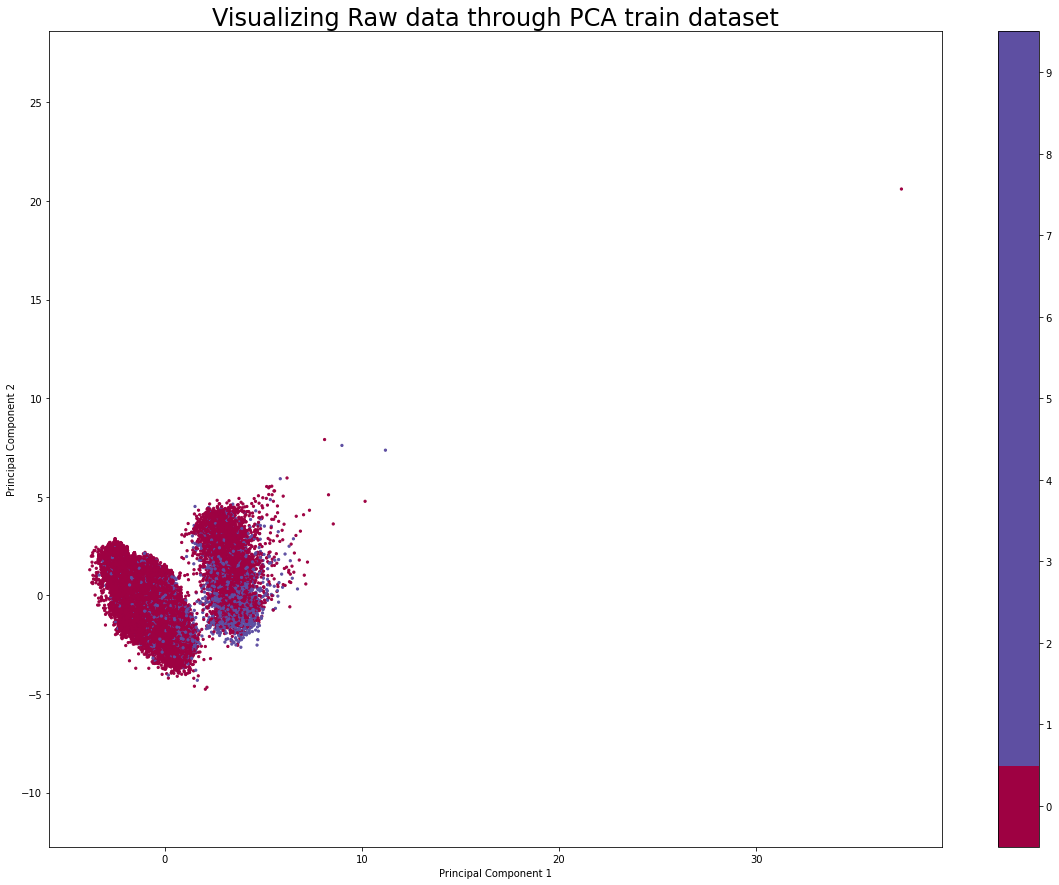

In [ ]:
plt.figure(figsize=(20,15))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], s= 5, c=train_y, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Raw data through PCA train dataset', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

Text(0, 0.5, 'Principal Component 2')

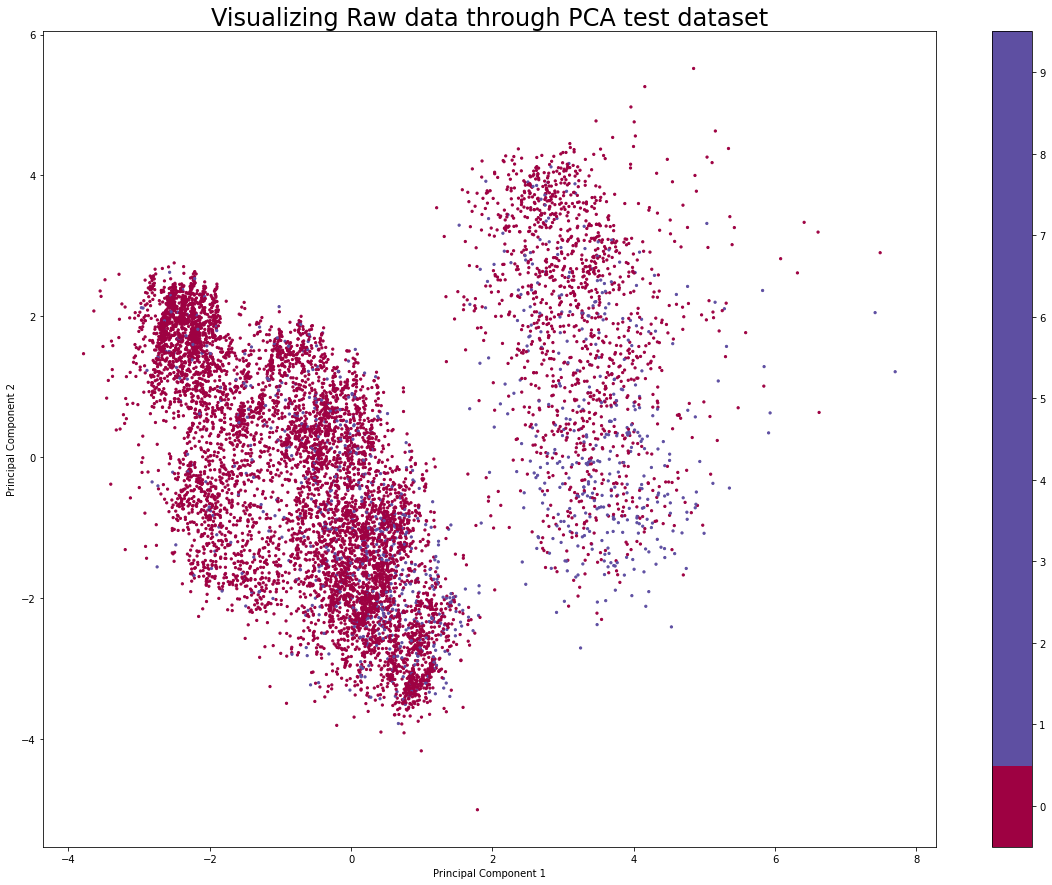

In [ ]:
plt.figure(figsize=(20,15))
principalComponents = pca_fit.transform(test_X1)
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], s= 5, c=test_y1, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Raw data through PCA test dataset', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

Text(0, 0.5, 'Principal Component 2')

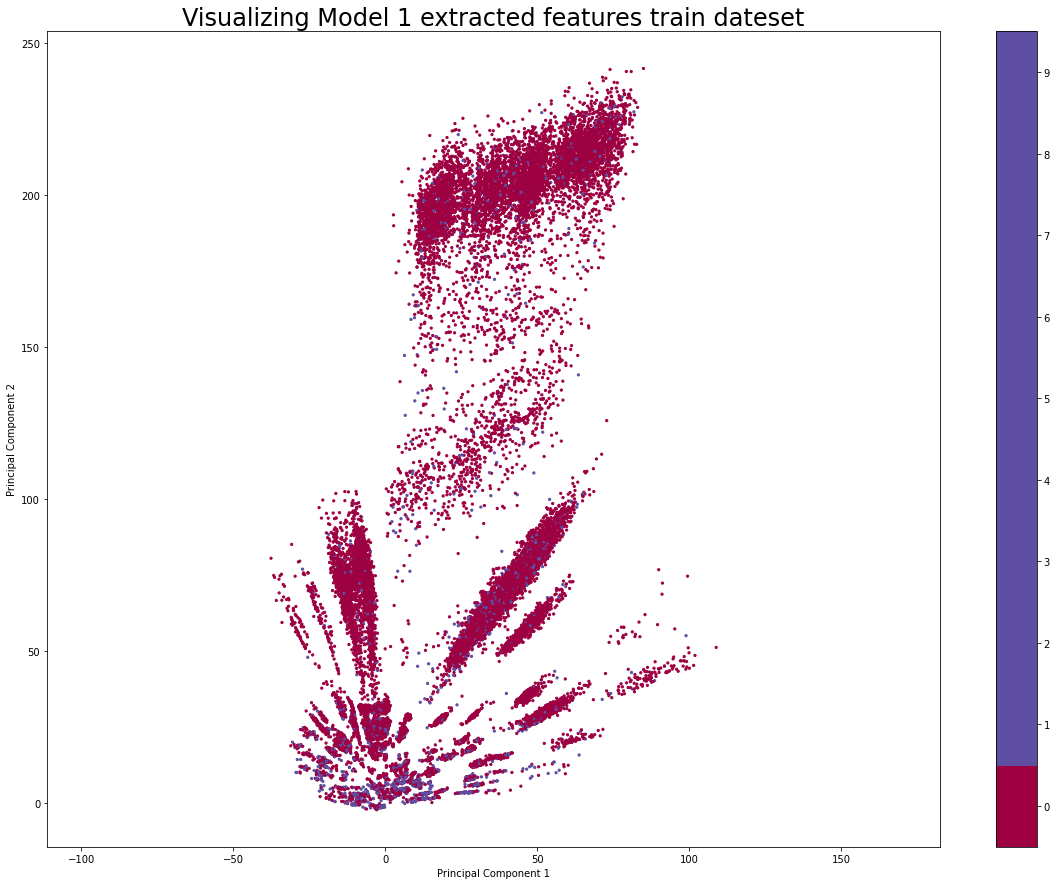

In [ ]:
# Model 1 Visualization 
plt.figure(figsize=(20,15))
plt.scatter(X_train_features[:, 0], X_train_features[:, 1], s= 5, c=train_y, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Model 1 extracted features train dateset', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

Text(0, 0.5, 'Principal Component 2')

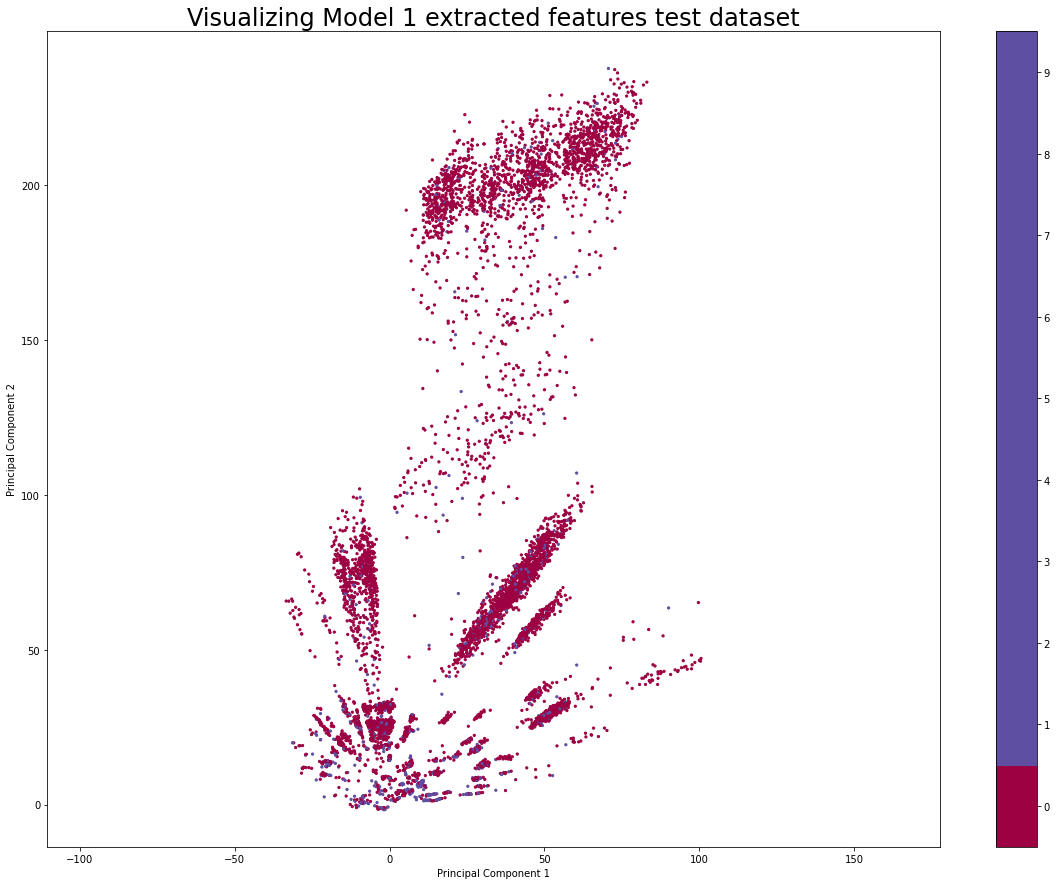

In [ ]:
plt.figure(figsize=(20,15))
plt.scatter(X_test_features[:, 0], X_test_features[:, 1], s= 5, c=test_y1, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Model 1 extracted features test dataset', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [ ]:
## Model 2 Visulization 
pca2 = PCA(n_components=2)
pca_fit2 = pca2.fit(X_train_features2)
principalComponents2 = pca_fit2.transform(X_train_features2) 

Text(0, 0.5, 'Principal Component 2')

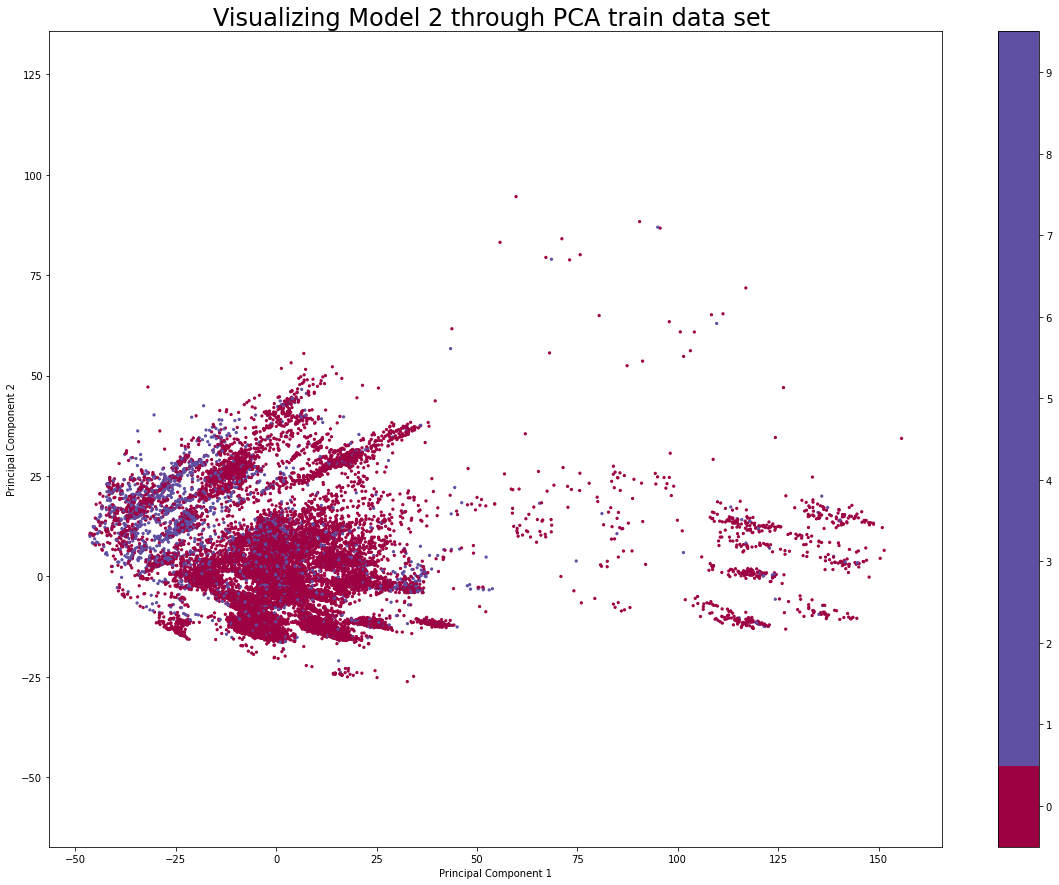

In [ ]:
plt.figure(figsize=(20,15))
plt.scatter(principalComponents2[:, 0], principalComponents2[:, 1], s= 5, c=train_y, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Model 2 through PCA train data set ', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [ ]:
principalComponents2 = pca_fit2.transform(X_test_features2)

Text(0, 0.5, 'Principal Component 2')

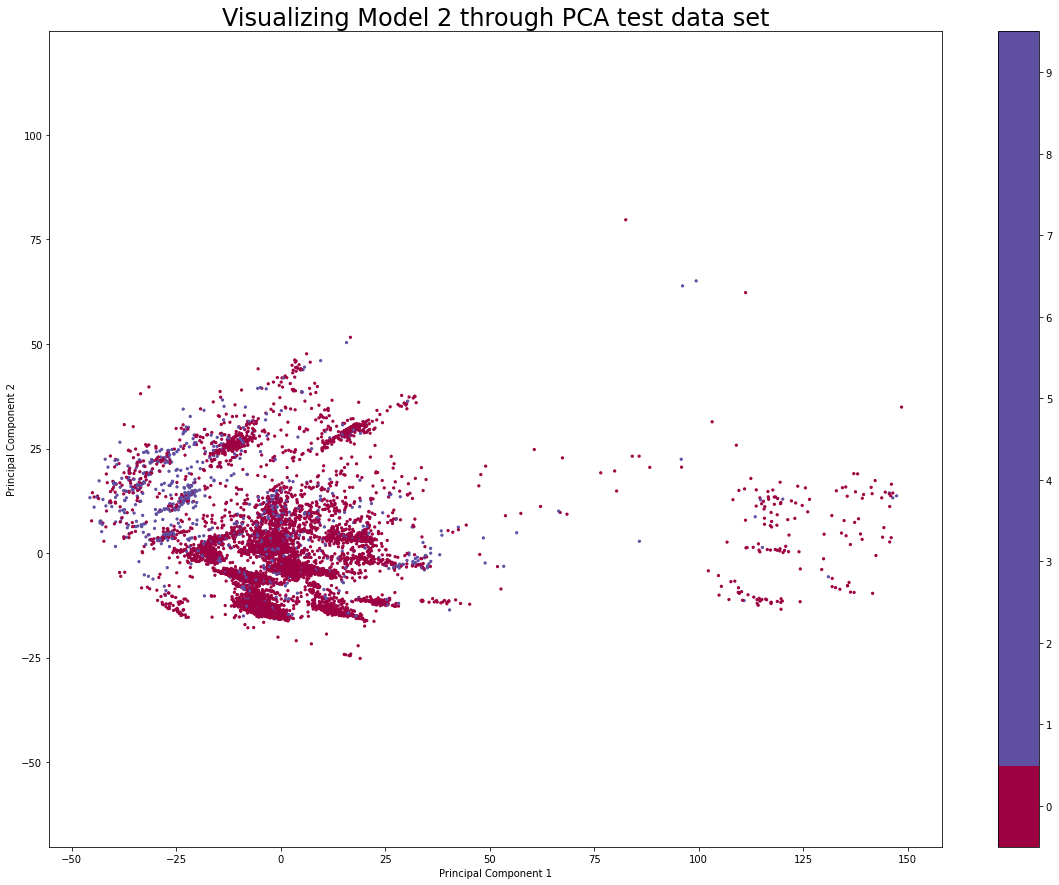

In [ ]:
plt.figure(figsize=(20,15))
plt.scatter(principalComponents2[:, 0], principalComponents2[:, 1], s= 5, c=test_y1, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Model 2 through PCA test data set', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

Text(0, 0.5, 'Principal Component 2')

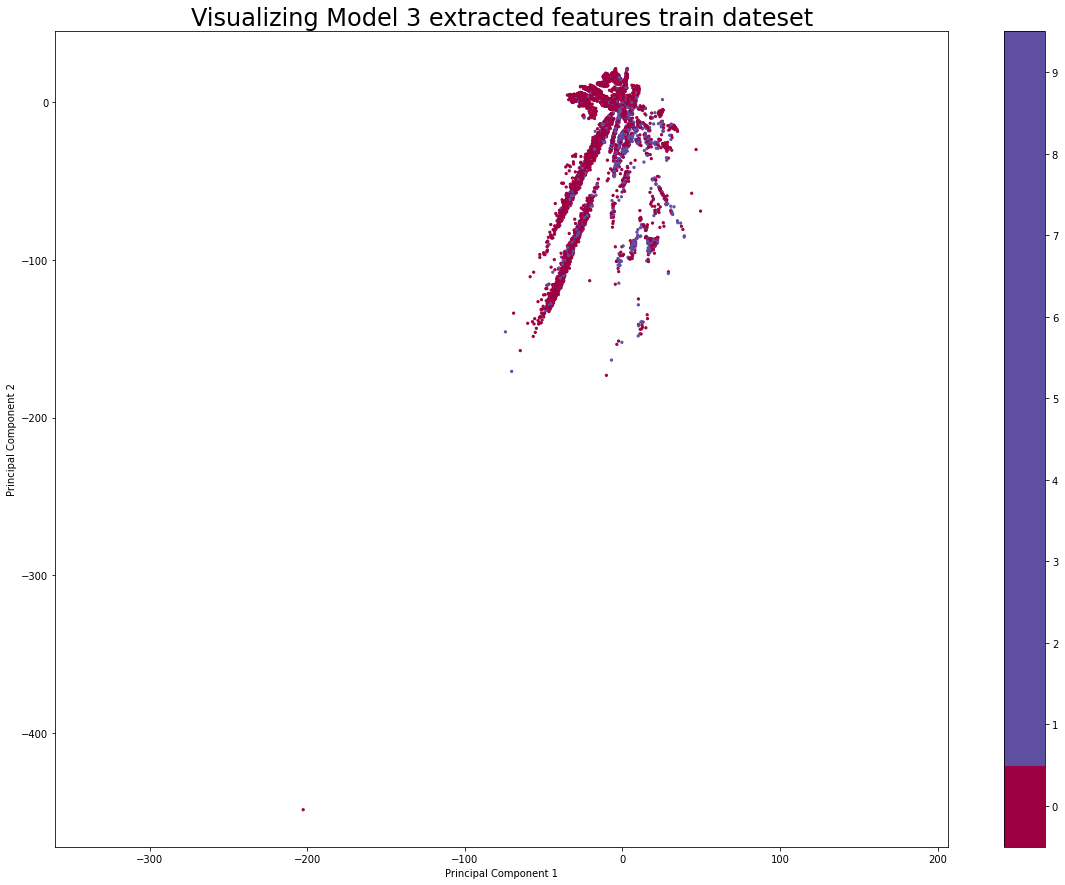

In [ ]:
## Model 3 Visulization
plt.figure(figsize=(20,15))
plt.scatter(X_train_features3[:, 0], X_train_features3[:, 1], s= 5, c=train_y, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Model 3 extracted features train dateset', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

Text(0, 0.5, 'Principal Component 2')

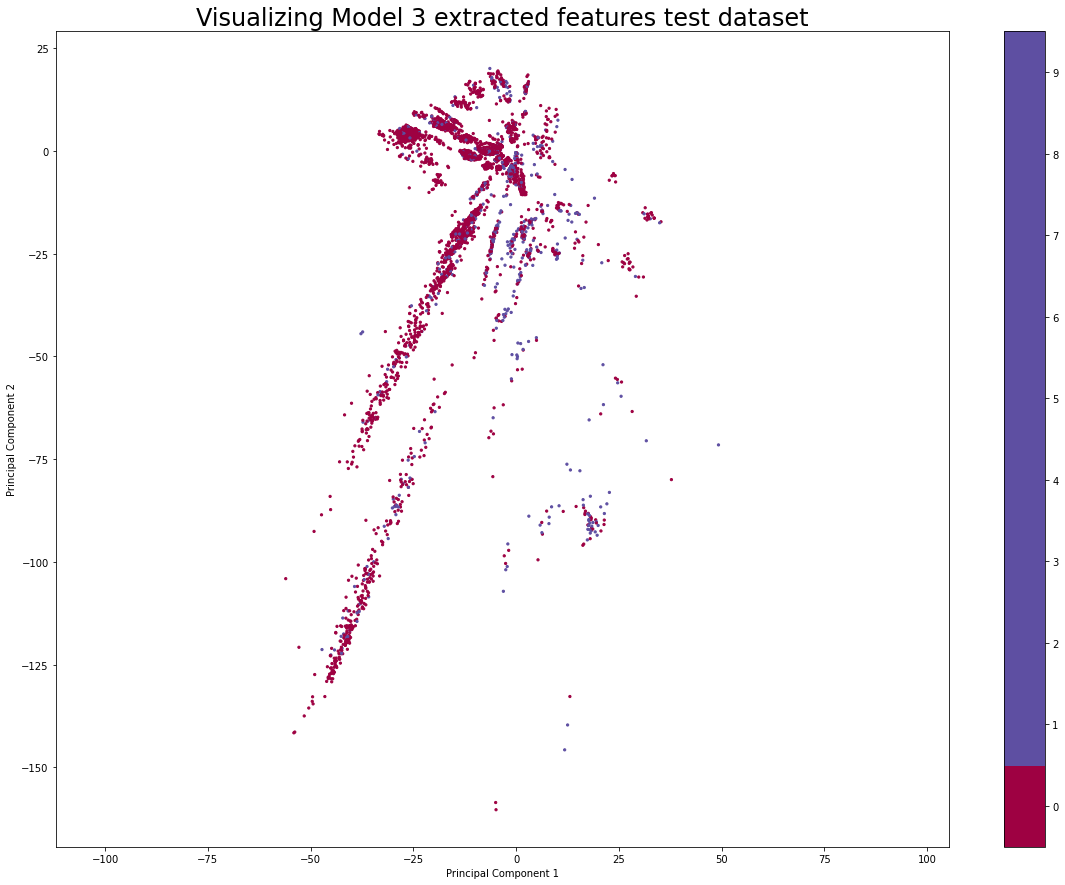

In [ ]:
plt.figure(figsize=(20,15))
plt.scatter(X_test_features3[:, 0], X_test_features3[:, 1], s= 5, c=test_y1, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Model 3 extracted features test dataset', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

## K means

In [ ]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'Principal Component 2')

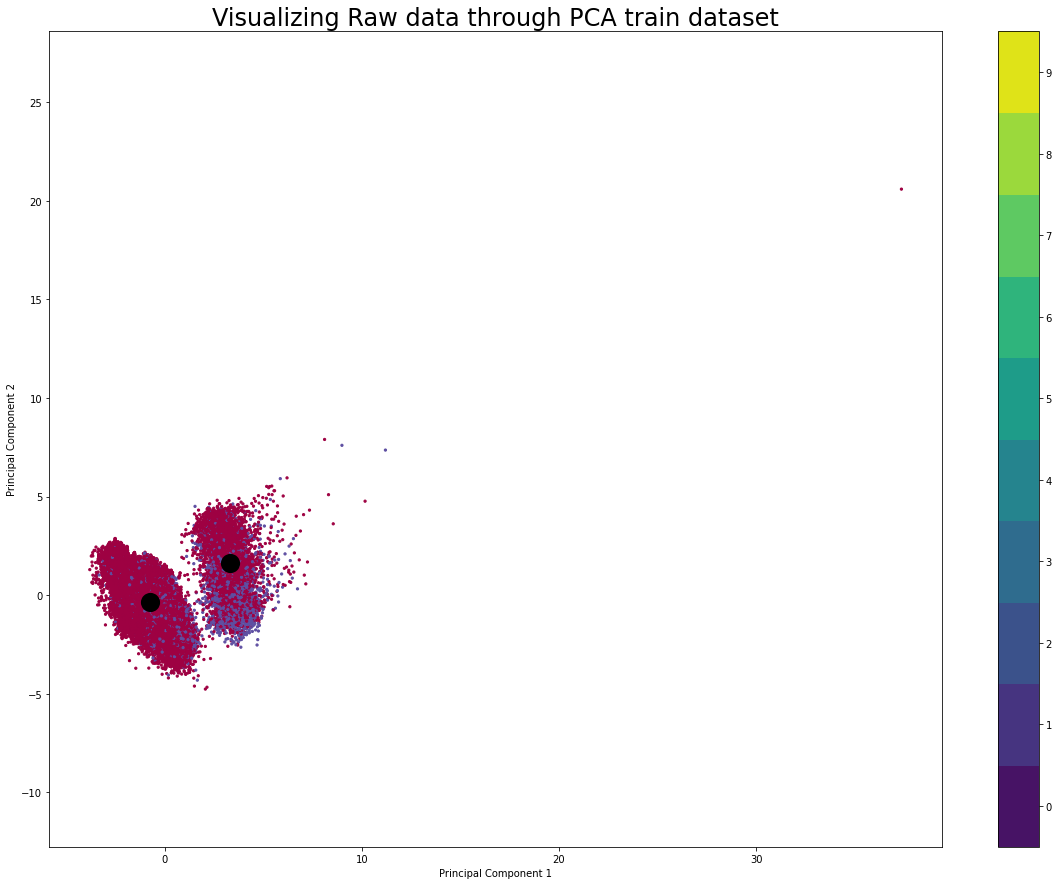

In [ ]:
pca = PCA(n_components=2)
PCA_fit = pca.fit(train_X)
PCA_train = pca.transform(train_X)
PCA_test = pca.transform(test_X1)
kmeans = KMeans(init="k-means++", n_clusters=2, n_init=4)
kmeans.fit(PCA_train)
plt.figure(figsize=(20,15))
plt.scatter(PCA_train[:, 0], PCA_train[:, 1], s= 5, c=train_y, cmap='Spectral')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="o", s=200, linewidths=5,
            color="Black", zorder=10)


plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Raw data through PCA train dataset', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


Text(0, 0.5, 'Principal Component 2')

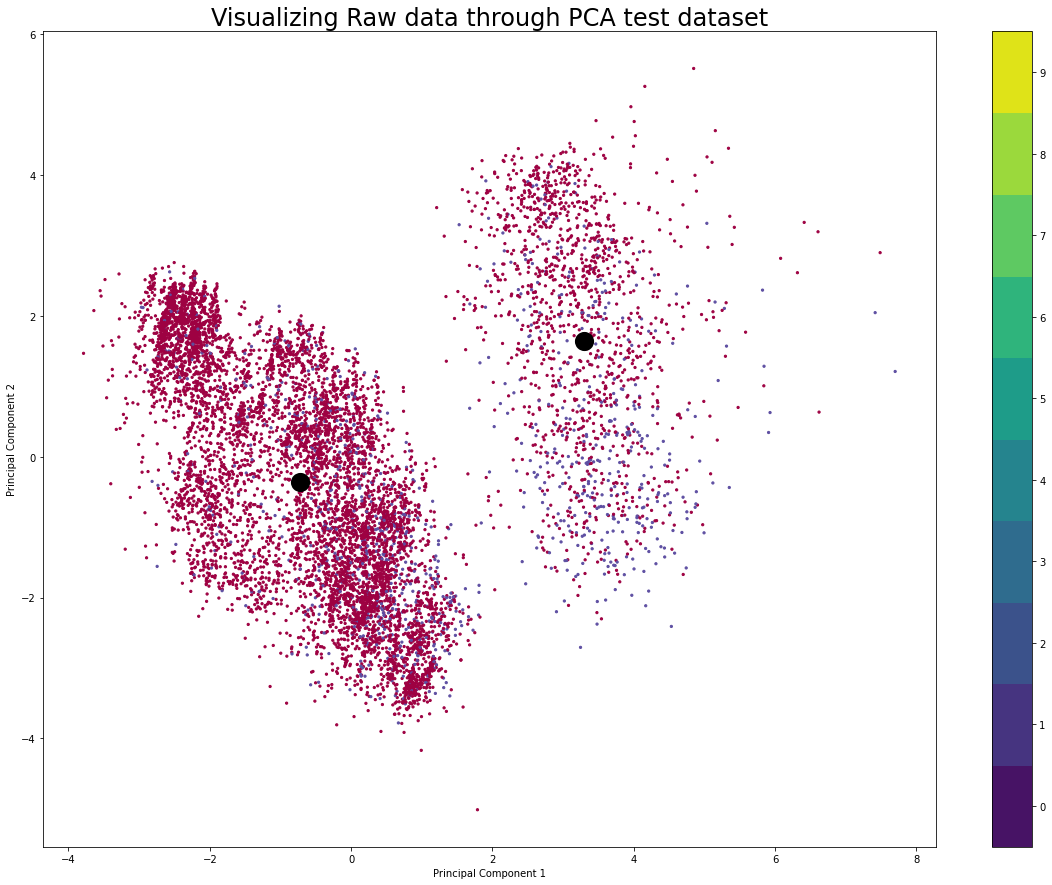

In [ ]:
plt.figure(figsize=(20,15))
plt.scatter(PCA_test[:, 0], PCA_test[:, 1], s= 5, c=test_y1, cmap='Spectral')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="o", s=200, linewidths=5,
            color="Black", zorder=10)


plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Raw data through PCA test dataset', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

Text(0, 0.5, 'Principal Component 2')

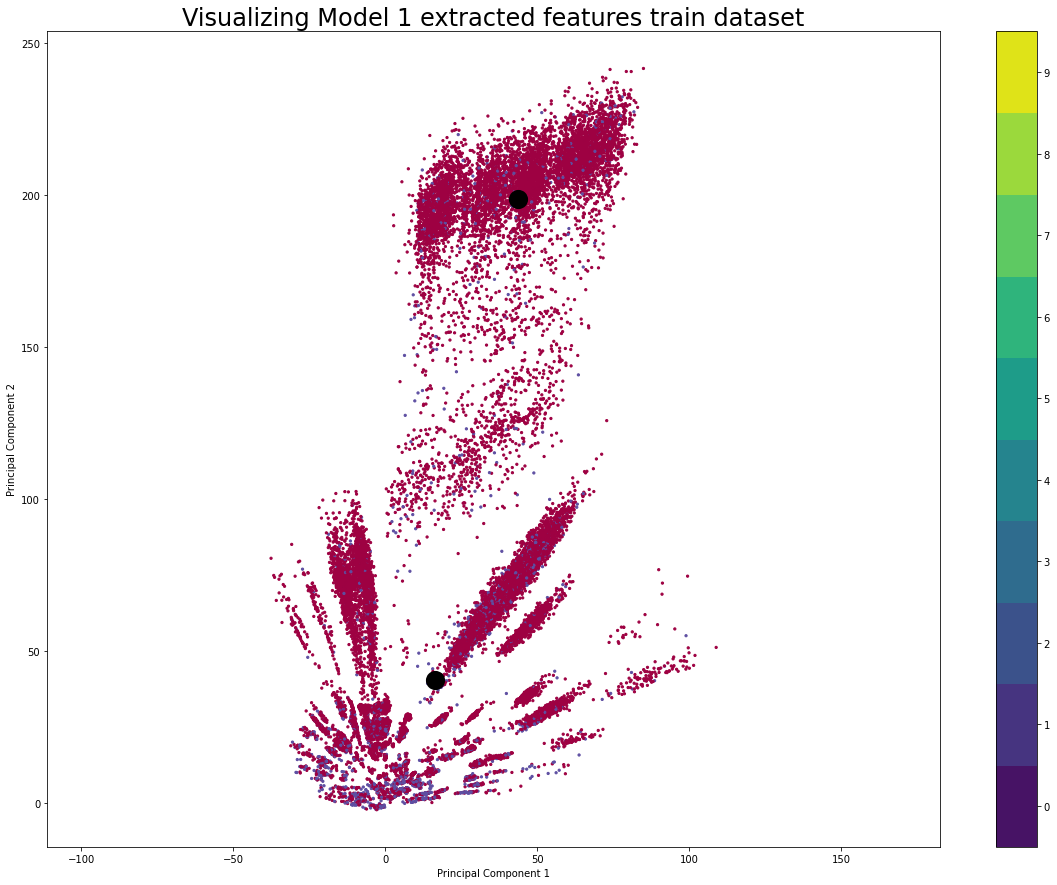

In [ ]:
pca = PCA(n_components=2)
kmeans = KMeans(init="k-means++", n_clusters=2, n_init=4)
kmeans.fit(X_train_features)
plt.figure(figsize=(20,15))
plt.scatter(X_train_features[:, 0], X_train_features[:, 1], s= 5, c=train_y, cmap='Spectral')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="o", s=200, linewidths=5,
            color="Black", zorder=10)


plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Model 1 extracted features train dataset', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

Text(0, 0.5, 'Principal Component 2')

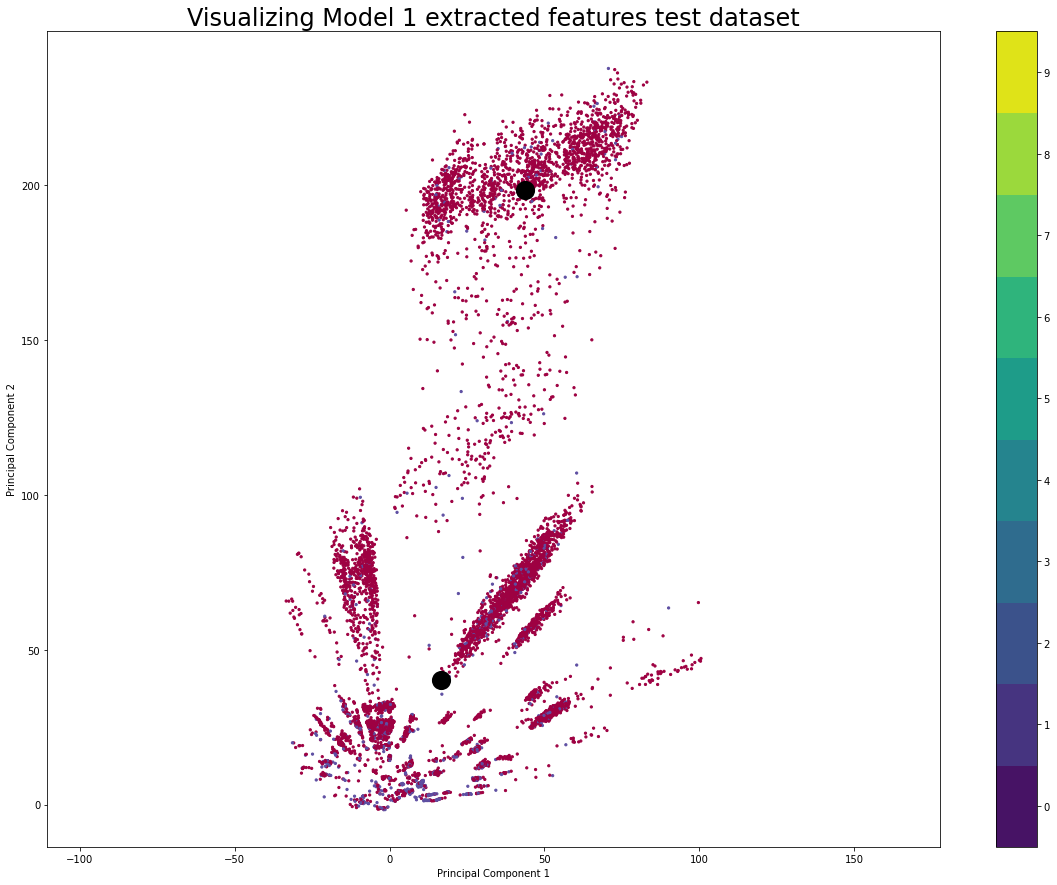

In [ ]:
plt.figure(figsize=(20,15))
plt.scatter(X_test_features[:, 0], X_test_features[:, 1], s= 5, c=test_y1, cmap='Spectral')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="o", s=200, linewidths=5,
            color="Black", zorder=10)


plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Model 1 extracted features test dataset', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


Text(0, 0.5, 'Principal Component 2')

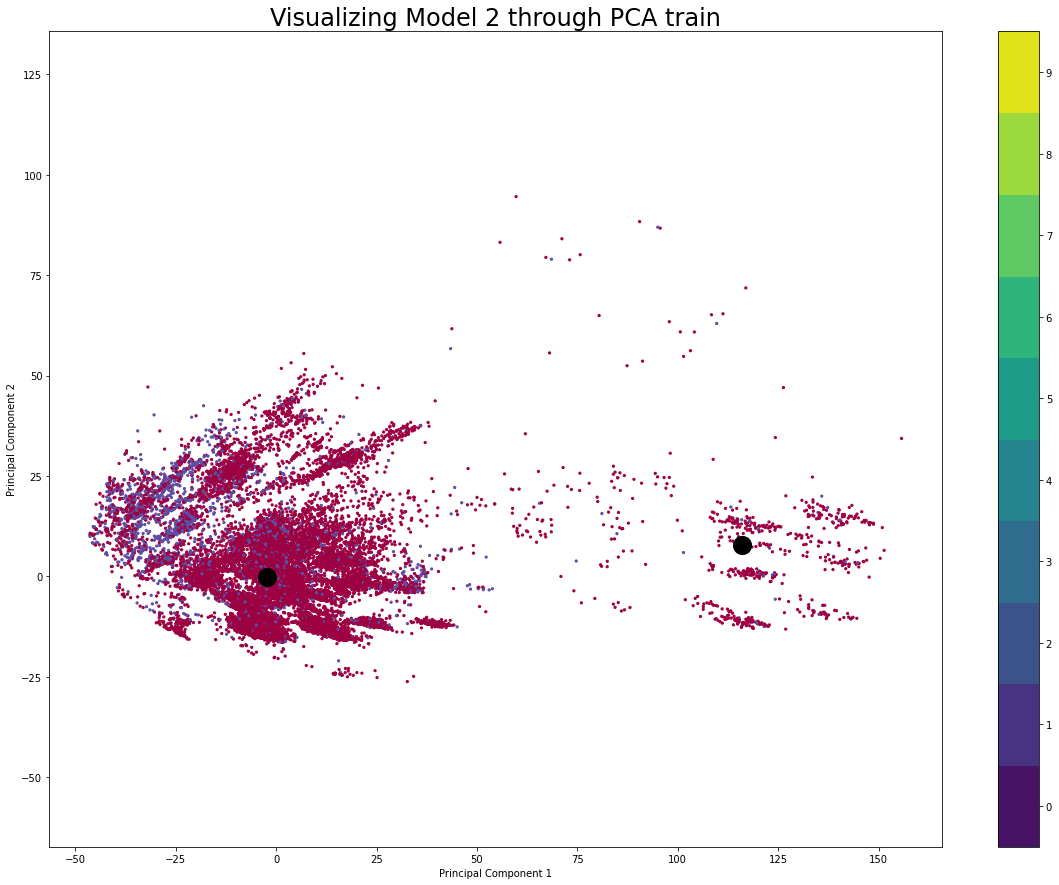

In [ ]:
pca = PCA(n_components=2)
PCA_fit = pca.fit(X_train_features2)
PCA_train = pca.transform(X_train_features2)
PCA_test = pca.transform(X_test_features2)
kmeans = KMeans(init="k-means++", n_clusters=2, n_init=4)
kmeans.fit(PCA_train)
plt.figure(figsize=(20,15))
plt.scatter(PCA_train[:, 0], PCA_train[:, 1], s= 5, c=train_y, cmap='Spectral')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="o", s=200, linewidths=5,
            color="Black", zorder=10)

plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Model 2 through PCA train', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

Text(0, 0.5, 'Principal Component 2')

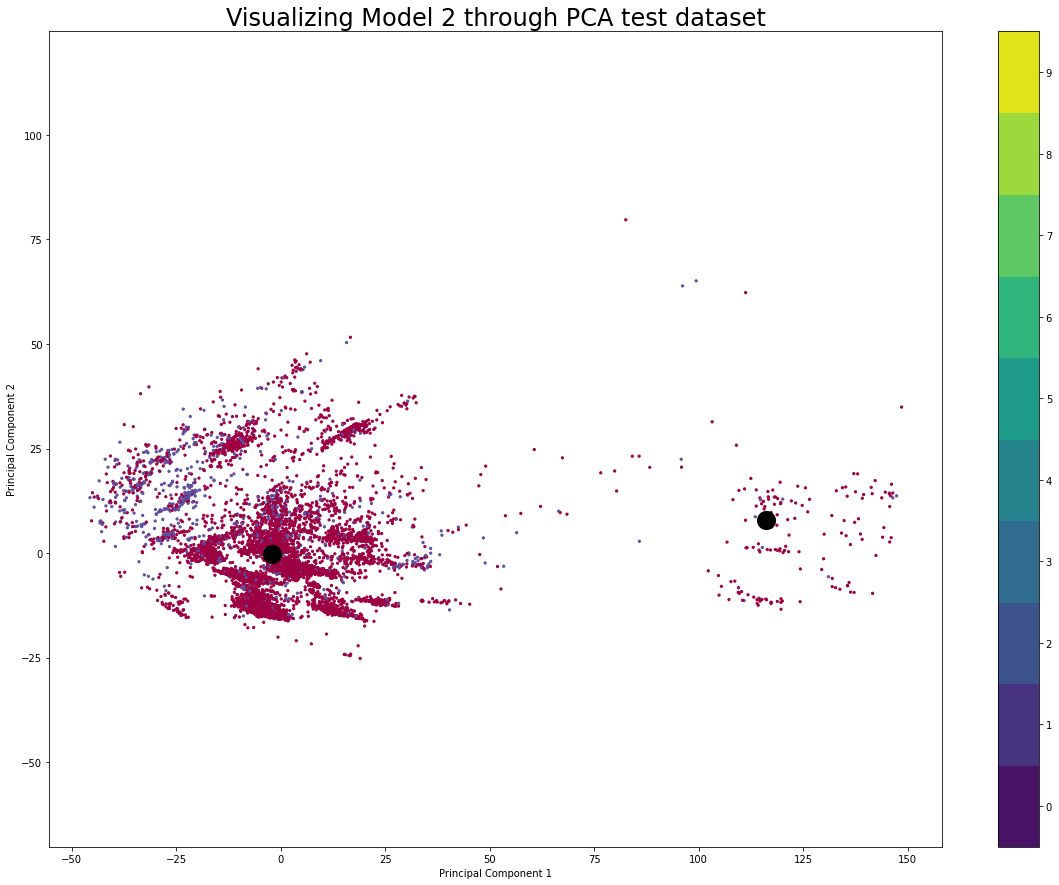

In [ ]:
plt.figure(figsize=(20,15))
plt.scatter(PCA_test[:, 0], PCA_test[:, 1], s= 5, c=test_y1, cmap='Spectral')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="o", s=200, linewidths=5,
            color="Black", zorder=10)


plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Model 2 through PCA test dataset', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


Text(0, 0.5, 'Principal Component 2')

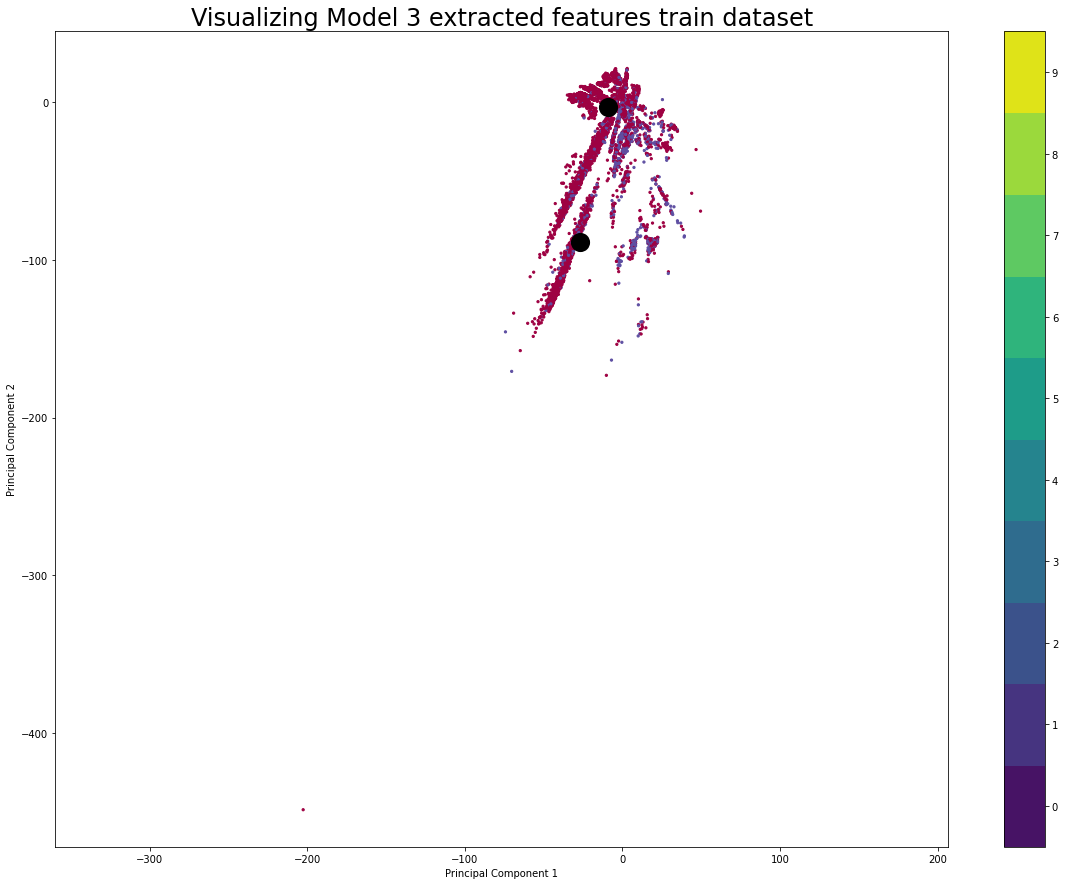

In [ ]:
pca = PCA(n_components=2)
kmeans = KMeans(init="k-means++", n_clusters=2, n_init=4)
kmeans.fit(X_train_features3)
plt.figure(figsize=(20,15))
plt.scatter(X_train_features3[:, 0], X_train_features3[:, 1], s= 5, c=train_y, cmap='Spectral')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="o", s=200, linewidths=5,
            color="Black", zorder=10)


plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Model 3 extracted features train dataset', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

Text(0, 0.5, 'Principal Component 2')

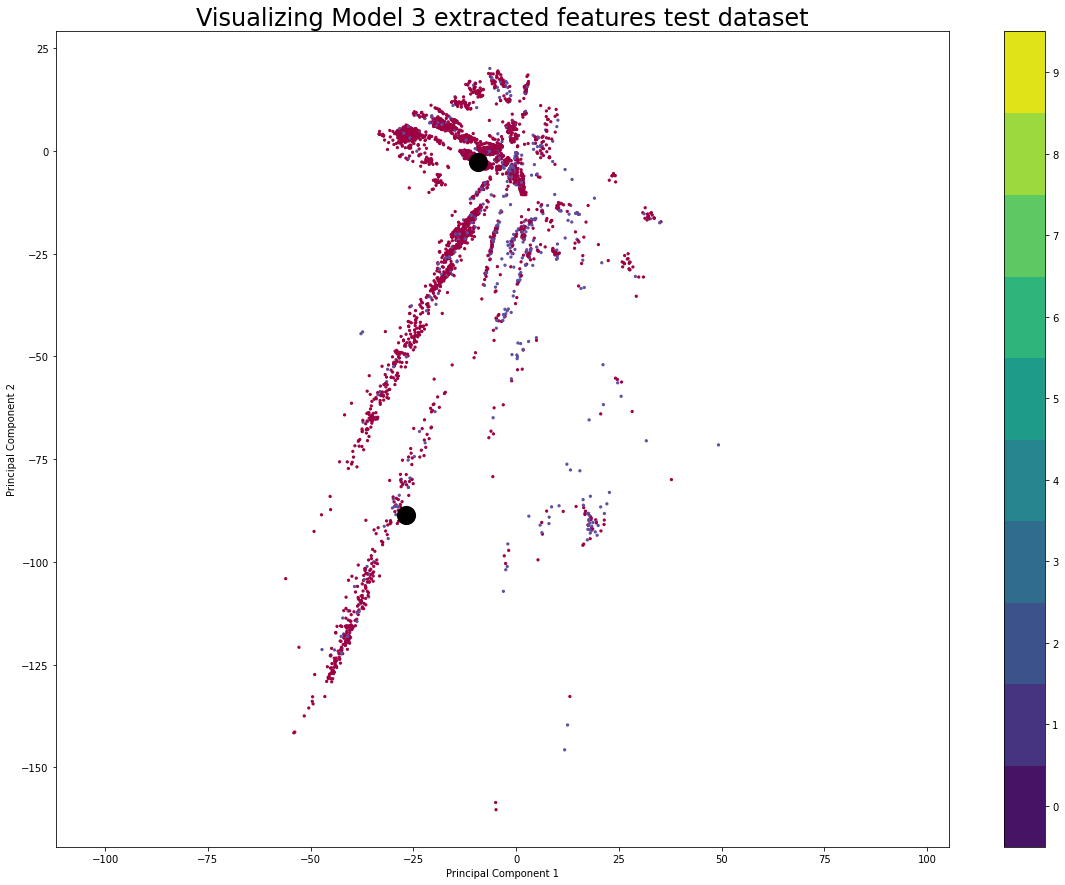

In [ ]:
plt.figure(figsize=(20,15))
plt.scatter(X_test_features3[:, 0], X_test_features3[:, 1], s= 5, c=test_y1, cmap='Spectral')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="o", s=200, linewidths=5,
            color="Black", zorder=10)


plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Model 3 extracted features test dataset', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

## Fit a Classifier on the Representation with fewer label data

In [ ]:
percentage_of_label = .10
number_of_samples = int(len(train_y) * percentage_of_label)

random_indexes = np.random.choice(range(0,len(train_y)), number_of_samples)
small_x_train = np.take(train_X,random_indexes,0)
small_y_train = np.take(train_y,random_indexes,0)


In [ ]:
pca = PCA(n_components=2)
PCA_fit = pca.fit(small_x_train)
PCA_train = pca.transform(small_x_train)
PCA_test_10 = pca.transform(test_X1)

In [ ]:
rf_reg = RandomForestClassifier(random_state=42)
rf_reg.fit(PCA_train, small_y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn import metrics
pred_test_PCA_10=rf_reg.predict_proba(PCA_test_10)[:,1]
print("AUC PCA on Test data is " +str(roc_auc_score(test_y1, pred_test_10)))

AUC PCA on Test data is 0.6660234868544873


In [ ]:
small_x_train = np.take(X_train_features,random_indexes,0)
small_y_train = np.take(train_y,random_indexes,0)
rf_reg = RandomForestClassifier(random_state=42)
rf_reg.fit(small_x_train, small_y_train)
pred_test_1=rf_reg.predict_proba(X_test_features)[:,1]
print("AUC on Test data for Model 1 is " +str(roc_auc_score(test_y1, pred_test_1)))

small_x_train2 = np.take(X_train_features2,random_indexes,0)
small_y_train2 = np.take(train_y,random_indexes,0)
rf_reg2 = RandomForestClassifier(random_state=42)
rf_reg2.fit(small_x_train2, small_y_train2)
pred_test2=rf_reg2.predict_proba(X_test_features2)[:,1]
print("AUC on Test data for Model 2 is " +str(roc_auc_score(test_y1, pred_test2)))

small_x_train3 = np.take(X_train_features3,random_indexes,0)
small_y_train3 = np.take(train_y,random_indexes,0)
rf_reg3 = RandomForestClassifier(random_state=42)
rf_reg3.fit(small_x_train3, small_y_train3)
pred_test3=rf_reg3.predict_proba(X_test_features3)[:,1]
print("AUC on Test data for Model 3 is " +str(roc_auc_score(test_y1, pred_test3)))

AUC on Test data for Model 1 is 0.6733291272743198
AUC on Test data for Model 2 is 0.7180719875286011
AUC on Test data for Model 3 is 0.6761324103677382


## Fit a Classifier on the Representation with fewer label data (25%, 50%, 75%, 100%)

In [ ]:
percentage_of_label = .25
number_of_samples = int(len(train_y) * percentage_of_label)

random_indexes = np.random.choice(range(0,len(train_y)), number_of_samples)
small_x_train = np.take(train_X,random_indexes,0)
small_y_train = np.take(train_y,random_indexes,0)

pca = PCA(n_components=2)
PCA_fit = pca.fit(small_x_train)
PCA_train_25 = pca.transform(small_x_train)
PCA_test_25 = pca.transform(test_X1)

rf_reg = RandomForestClassifier(random_state=42)
rf_reg.fit(PCA_train_25, small_y_train)

pred_test_25=rf_reg.predict_proba(PCA_test_25)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(test_y1, pred_test_25)
print("AUC on Test data for PCA test is " +str(roc_auc_score(test_y1, pred_test_25)))

small_x_train = np.take(X_train_features,random_indexes,0)
small_y_train = np.take(train_y,random_indexes,0)
rf_reg = RandomForestClassifier(random_state=42)
rf_reg.fit(small_x_train, small_y_train)
pred_test_model1_25=rf_reg.predict_proba(X_test_features)[:,1]
print("AUC on Test data for Model 1 is " +str(roc_auc_score(test_y1, pred_test_model1_25)))

small_x_train2 = np.take(X_train_features2,random_indexes,0)
small_y_train2 = np.take(train_y,random_indexes,0)
rf_reg2 = RandomForestClassifier(random_state=42)
rf_reg2.fit(small_x_train2, small_y_train2)
pred_test_model2_25=rf_reg2.predict_proba(X_test_features2)[:,1]
print("AUC on Test data for model 2 is " +str(roc_auc_score(test_y1, pred_test_model2_25)))

small_x_train3 = np.take(X_train_features3,random_indexes,0)
small_y_train3 = np.take(train_y,random_indexes,0)
rf_reg3 = RandomForestClassifier(random_state=42)
rf_reg3.fit(small_x_train3, small_y_train3)
pred_test_model3_25=rf_reg3.predict_proba(X_test_features3)[:,1]
print("AUC on Test data for Model 3 is " +str(roc_auc_score(test_y1, pred_test_model3_25)))


AUC on Test data for PCA test is 0.664249425612532
AUC on Test data for Model 1 is 0.6754457495327368
AUC on Test data for model 2 is 0.7199127499221721
AUC on Test data for Model 3 is 0.6678712330421053


In [ ]:
percentage_of_label = .5
number_of_samples = int(len(train_y) * percentage_of_label)

random_indexes = np.random.choice(range(0,len(train_y)), number_of_samples)
small_x_train = np.take(train_X,random_indexes,0)
small_y_train = np.take(train_y,random_indexes,0)

pca = PCA(n_components=2)
PCA_fit = pca.fit(small_x_train)
PCA_train = pca.transform(small_x_train)
PCA_test = pca.transform(test_X1)

rf_reg = RandomForestClassifier(random_state=42)
rf_reg.fit(PCA_train, small_y_train)

pred_test=rf_reg.predict_proba(PCA_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(test_y1, pred_test)
print("AUC on Test data for PCA test is " +str(roc_auc_score(test_y1, pred_test)))

small_x_train = np.take(X_train_features,random_indexes,0)
small_y_train = np.take(train_y,random_indexes,0)
rf_reg = RandomForestClassifier(random_state=42)
rf_reg.fit(small_x_train, small_y_train)
pred_test=rf_reg.predict_proba(X_test_features)[:,1]
print("AUC on Test data for Model 1 is " +str(roc_auc_score(test_y1, pred_test)))

small_x_train2 = np.take(X_train_features2,random_indexes,0)
small_y_train2 = np.take(train_y,random_indexes,0)
rf_reg2 = RandomForestClassifier(random_state=42)
rf_reg2.fit(small_x_train2, small_y_train2)
pred_test2=rf_reg2.predict_proba(X_test_features2)[:,1]
print("AUC on Test data for model 2 is " +str(roc_auc_score(test_y1, pred_test2)))

small_x_train3 = np.take(X_train_features3,random_indexes,0)
small_y_train3 = np.take(train_y,random_indexes,0)
rf_reg3 = RandomForestClassifier(random_state=42)
rf_reg3.fit(small_x_train3, small_y_train3)
pred_test3=rf_reg3.predict_proba(X_test_features3)[:,1]
print("AUC on Test data for Model 3 is " +str(roc_auc_score(test_y1, pred_test3)))


AUC on Test data for PCA test is 0.6557829957635596
AUC on Test data for Model 1 is 0.6766349476156261
AUC on Test data for model 2 is 0.7187384663825012
AUC on Test data for Model 3 is 0.6652069156132777


In [ ]:
percentage_of_label = .75
number_of_samples = int(len(train_y) * percentage_of_label)

random_indexes = np.random.choice(range(0,len(train_y)), number_of_samples)
small_x_train = np.take(train_X,random_indexes,0)
small_y_train = np.take(train_y,random_indexes,0)

pca = PCA(n_components=2)
PCA_fit = pca.fit(small_x_train)
PCA_train = pca.transform(small_x_train)
PCA_test = pca.transform(test_X1)

rf_reg = RandomForestClassifier(random_state=42)
rf_reg.fit(PCA_train, small_y_train)

pred_test=rf_reg.predict_proba(PCA_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(test_y1, pred_test)
print("AUC on Test data for PCA test is " +str(roc_auc_score(test_y1, pred_test)))

small_x_train = np.take(X_train_features,random_indexes,0)
small_y_train = np.take(train_y,random_indexes,0)
rf_reg = RandomForestClassifier(random_state=42)
rf_reg.fit(small_x_train, small_y_train)
pred_test=rf_reg.predict_proba(X_test_features)[:,1]
print("AUC on Test data for Model 1 is " +str(roc_auc_score(test_y1, pred_test)))

small_x_train2 = np.take(X_train_features2,random_indexes,0)
small_y_train2 = np.take(train_y,random_indexes,0)
rf_reg2 = RandomForestClassifier(random_state=42)
rf_reg2.fit(small_x_train2, small_y_train2)
pred_test2=rf_reg2.predict_proba(X_test_features2)[:,1]
print("AUC on Test data for model 2 is " +str(roc_auc_score(test_y1, pred_test2)))

small_x_train3 = np.take(X_train_features3,random_indexes,0)
small_y_train3 = np.take(train_y,random_indexes,0)
rf_reg3 = RandomForestClassifier(random_state=42)
rf_reg3.fit(small_x_train3, small_y_train3)
pred_test3=rf_reg3.predict_proba(X_test_features3)[:,1]
print("AUC on Test data for Model 3 is " +str(roc_auc_score(test_y1, pred_test3)))


AUC on Test data for PCA test is 0.6464202137040979
AUC on Test data for Model 1 is 0.6906552692726082
AUC on Test data for model 2 is 0.7309460200067944
AUC on Test data for Model 3 is 0.6718947269987559


In [ ]:
percentage_of_label = 1
number_of_samples = int(len(train_y) * percentage_of_label)

random_indexes = np.random.choice(range(0,len(train_y)), number_of_samples)
small_x_train = np.take(train_X,random_indexes,0)
small_y_train = np.take(train_y,random_indexes,0)

pca = PCA(n_components=2)
PCA_fit = pca.fit(small_x_train)
PCA_train = pca.transform(small_x_train)
PCA_test = pca.transform(test_X1)

rf_reg = RandomForestClassifier(random_state=42)
rf_reg.fit(PCA_train, small_y_train)

pred_test=rf_reg.predict_proba(PCA_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(test_y1, pred_test)
print("AUC on Test data for PCA test is " +str(roc_auc_score(test_y1, pred_test)))

small_x_train = np.take(X_train_features,random_indexes,0)
small_y_train = np.take(train_y,random_indexes,0)
rf_reg = RandomForestClassifier(random_state=42)
rf_reg.fit(small_x_train, small_y_train)
pred_test=rf_reg.predict_proba(X_test_features)[:,1]
print("AUC on Test data for Model 1 is " +str(roc_auc_score(test_y1, pred_test)))

small_x_train2 = np.take(X_train_features2,random_indexes,0)
small_y_train2 = np.take(train_y,random_indexes,0)
rf_reg2 = RandomForestClassifier(random_state=42)
rf_reg2.fit(small_x_train2, small_y_train2)
pred_test2=rf_reg2.predict_proba(X_test_features2)[:,1]
print("AUC on Test data for model 2 is " +str(roc_auc_score(test_y1, pred_test2)))

small_x_train3 = np.take(X_train_features3,random_indexes,0)
small_y_train3 = np.take(train_y,random_indexes,0)
rf_reg3 = RandomForestClassifier(random_state=42)
rf_reg3.fit(small_x_train3, small_y_train3)
pred_test3=rf_reg3.predict_proba(X_test_features3)[:,1]
print("AUC on Test data for Model 3 is " +str(roc_auc_score(test_y1, pred_test3)))

AUC on Test data for PCA test is 0.6607830963775415
AUC on Test data for Model 1 is 0.6824549338137552
AUC on Test data for model 2 is 0.7203299428394212
AUC on Test data for Model 3 is 0.6640680837060983


## Results

Different sample percentages (10%, 25%, 50%, 75%, 100%) of training data were taken and Random Forest classifier was developed in each case. In order to evaluate and compare the performance of models the AUC test was utilized. By training the 10% of the data, the performance of the models on test data set were as below: 

AUC PCA on Test data is 0.6660234868544873\
AUC on Test data for Model 1 is 0.6733291272743198\
AUC on Test data for Model 2 is 0.7180719875286011\
AUC on Test data for Model 3 is 0.6761324103677382

The Model 2 had a best performance. Using autoencoder improved the accuracy in all cases. Model 3 has more hidden layers than model 2 but it did not improve the accuracy. 

In the second step we increased the training data to 25%. The results were as below: \

percentage_of_label = .25\
AUC on Test data for PCA test is 0.664249425612532\
AUC on Test data for Model 1 is 0.6754457495327368\
AUC on Test data for model 2 is 0.7199127499221721\
AUC on Test data for Model 3 is 0.6678712330421053

Again, the Model 2 outperformed all other models. In the third step, we increased the training data to 50% and the results were: \

percentage_of_label = .50\
AUC on Test data for PCA test is 0.6557829957635596\
AUC on Test data for Model 1 is 0.6766349476156261\
AUC on Test data for model 2 is 0.7187384663825012\
AUC on Test data for Model 3 is 0.6652069156132777

Model 2 performance accuracy was the best. In this case, model 3 outperformed the PCA. In the 2 final steps we increased the training data to 75% an 100% :\

percentage_of_label = .75\
AUC on Test data for PCA test is 0.6557829957635596\
AUC on Test data for Model 1 is 0.6766349476156261\
AUC on Test data for model 2 is 0.7187384663825012\
AUC on Test data for Model 3 is 0.6652069156132777

percentage_of_label = 1\
AUC on Test data for PCA test is 0.6607830963775415\
AUC on Test data for Model 1 is 0.6824549338137552\
AUC on Test data for model 2 is 0.7203299428394212\
AUC on Test data for Model 3 is 0.6640680837060983

In both cases, model 2 outperformed other models. 

The best performing model was the model 2 in all situations which has encoder with latent variable of size 8 and has 2 hidden layers. In this model the input layer gets 50 features and compress it to 40, in the second layer 40 features are compressed to 30 and in the next layer they are compressed to 20 and in the latent layer they get to 8 features. In model 1 and 3, I extracted only 2 features and compressed the 50 features into 2 which were not successful. So compressing the number of features to 8 was a better strategy in this problem. 

Autoencoder in model 2 outperformed the PCA in all cases. I can conclude that the Autoencoder could improve the performance if we tune the hyperparameters and train enough data. We had the best performance of Model 2 when we trained only 10% of the data. 


## Conclusion:  
Large organizations need to optimize their business processes, control expenses, and increase revenue to successfully competes in the marketplace. One of the most common practices in the finance industry is to run a marketing campaign for cross-selling (marketing additional products to existing customers) or to attract new clients. Our focus in this research was on phone-based marketing campaigns for cross-selling products. By developing a predictive model, we can identify the right customers to be contacted and help the banks to optimise their marketing efforts and increase their profit.  In this project, we performed exploratory analysis on the dataset and we found out that the highest success rate belongs to customers who has a management job, which could make sense as they are busy individuals and the tendency to accept a deal over the phone could be higher among them. Also 3 different models were fitted and the Random Forest performed better than Logistic Regression and Decision Tree and beat the benchmark. 

The data set is not big enough to train a deep learning model. It’s a small dataset and the deep learning models did not outperform the machine learning techniques. Although, as the number of layers and number of neurons were increased, the performance was improved as well. The Random forest was the best model and outperform all other models. 

By using the PCA and autoencoder models we did not outperform the Random Forest. Autoencoder produced did not beat the benchmark (0.7694) and the MLP models. The best autoencoder performance model was the model which has encoder with latent variable of size 8 and has 2 hidden layers. The input layer get 50 features and compress it to 40 , in the second layer 40 features are compressed to 30 and in the next layer they are compressed to 20 and in the latent layer they gets to 8 features. 


## References:
Akrami, H., et al. (2020). "Robust Variational Autoencoder for Tabular Data with Beta Divergence." arXiv preprint arXiv:2006.08204.

Beucher, A., Moller, A. & Greve, M. (2017), `Artificial neural networks and decision tree classification for predicting soil drainage classes in denmark', Geoderma 

Friedman, J., Hastie, T. & Tibshirani, R. (2001), The elements of statistical learning, Vol. 1,
Springer series in statistics New York.

Grzonka, D., et al. (2016). "Application of selected supervised classification methods to bank marketing campaign." Information Systems in Management 5(1): 36-48.

Kim, K.-H., et al. (2015). Predicting the success of bank telemarketing using deep convolutional neural network. 2015 7th International Conference of Soft Computing and Pattern Recognition (SoCPaR), IEEE.

Jain, A. K., et al. (1999). "Data clustering: a review." ACM computing surveys (CSUR) 31(3): 264-323.
Mancisidor, R. A., et al. (2019). "Learning latent representations of bank customers with the variational autoencoder." arXiv preprint arXiv:1903.06580.

Moro, S., et al. (2011). "Using data mining for bank direct marketing: An application of the crisp-dm methodology."

Moro, S., et al. (2014). "A data-driven approach to predict the success of bank telemarketing." Decision Support Systems 62: 22-31.

Song, C., et al. (2013). Auto-encoder based data clustering. Iberoamerican congress on pattern recognition, Springer.

Selma, M. (2020). "Predicting the Success of Bank Telemarketing Using Artificial Neural Network." International Journal of Economics and Management Engineering 14(1): 1-4.
	


